In [1]:
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#switch the years to analyze different years

#data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [4]:
import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = r"C:\Users\estifo\OneDrive\Projects\gamma-capture-project\data"

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2010, 2021):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())

                 0       1       2       3       4  5
0  20100103 170000  1.4301  1.4304  1.4301  1.4304  0
1  20100103 170100  1.4303  1.4303  1.4303  1.4303  0
2  20100103 170200  1.4302  1.4303  1.4301  1.4303  0
3  20100103 170300  1.4302  1.4302  1.4302  1.4302  0
4  20100103 170400  1.4301  1.4302  1.4298  1.4300  0


In [5]:
data.tail()

,0,1,2,3,4,5
4053929,20201231 165400,1.22159,1.22182,1.22153,1.22175,0
4053930,20201231 165500,1.22175,1.22180,1.22170,1.22174,0
4053931,20201231 165600,1.22176,1.22179,1.22160,1.22165,0
4053932,20201231 165700,1.22166,1.22167,1.22153,1.22164,0
4053933,20201231 165800,1.22163,1.22168,1.22143,1.22153,0


In [6]:
data.shape

(4053934, 6)

In [7]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [8]:
data.tail(4)

,DateTime,Open,High,Low,Close,Volume
4053930,20201231 165500,1.22175,1.22180,1.22170,1.22174,0
4053931,20201231 165600,1.22176,1.22179,1.22160,1.22165,0
4053932,20201231 165700,1.22166,1.22167,1.22153,1.22164,0
4053933,20201231 165800,1.22163,1.22168,1.22143,1.22153,0


In [9]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [10]:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])

DateTime
2019-10-27 19:00:00    2
2019-10-27 19:01:00    2
2019-10-27 19:02:00    2
2019-10-27 19:03:00    2
2019-10-27 19:04:00    2
                      ..
2020-10-25 19:55:00    2
2020-10-25 19:56:00    2
2020-10-25 19:57:00    2
2020-10-25 19:58:00    2
2020-10-25 19:59:00    2
Name: count, Length: 120, dtype: int64


In [11]:
# 1) Make a boolean mask for every duplicated timestamp (marking all occurrences)
dup_mask = data['DateTime'].duplicated(keep=False)

# 2) Subset and sort so we see each duplicated group in one place
dupe_rows = data.loc[dup_mask].sort_values('DateTime')

print(dupe_rows)


                   DateTime     Open     High      Low    Close  Volume
3615027 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
3615087 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
3615028 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
3615088 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
3615029 2019-10-27 19:02:00  1.10826  1.10826  1.10822  1.10822       0
...                     ...      ...      ...      ...      ...     ...
3985936 2020-10-25 19:57:00  1.18451  1.18463  1.18450  1.18453       0
3985997 2020-10-25 19:58:00  1.18453  1.18456  1.18447  1.18447       0
3985937 2020-10-25 19:58:00  1.18453  1.18456  1.18447  1.18447       0
3985938 2020-10-25 19:59:00  1.18448  1.18448  1.18436  1.18443       0
3985998 2020-10-25 19:59:00  1.18448  1.18448  1.18436  1.18443       0

[240 rows x 6 columns]


In [12]:
data.tail()

,DateTime,Open,High,Low,Close,Volume
4053929,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0
4053930,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0
4053931,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0
4053932,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0
4053933,2020-12-31 16:58:00,1.22163,1.22168,1.22143,1.22153,0


In [13]:
data.set_index('DateTime', inplace=True)

In [14]:
data

,Open,High,Low,Close,Volume
DateTime,,,,,
2010-01-03 17:00:00,1.43010,1.43040,1.43010,1.43040,0
2010-01-03 17:01:00,1.43030,1.43030,1.43030,1.43030,0
2010-01-03 17:02:00,1.43020,1.43030,1.43010,1.43030,0
2010-01-03 17:03:00,1.43020,1.43020,1.43020,1.43020,0
2010-01-03 17:04:00,1.43010,1.43020,1.42980,1.43000,0
...,...,...,...,...,...
2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0
2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0
2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0


In [15]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\4214865167.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [16]:
full_range

DatetimeIndex(['2010-01-03 17:00:00', '2010-01-03 17:01:00',
               '2010-01-03 17:02:00', '2010-01-03 17:03:00',
               '2010-01-03 17:04:00', '2010-01-03 17:05:00',
               '2010-01-03 17:06:00', '2010-01-03 17:07:00',
               '2010-01-03 17:08:00', '2010-01-03 17:09:00',
               ...
               '2020-12-31 16:49:00', '2020-12-31 16:50:00',
               '2020-12-31 16:51:00', '2020-12-31 16:52:00',
               '2020-12-31 16:53:00', '2020-12-31 16:54:00',
               '2020-12-31 16:55:00', '2020-12-31 16:56:00',
               '2020-12-31 16:57:00', '2020-12-31 16:58:00'],
              dtype='datetime64[ns]', length=5781599, freq='min')

In [17]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2010-01-03 17:05:00', '2010-01-03 17:07:00',
               '2010-01-03 17:11:00', '2010-01-03 17:14:00',
               '2010-01-03 17:15:00', '2010-01-03 17:16:00',
               '2010-01-03 17:17:00', '2010-01-03 17:18:00',
               '2010-01-03 17:24:00', '2010-01-03 17:25:00',
               ...
               '2020-12-29 17:42:00', '2020-12-29 17:46:00',
               '2020-12-29 17:55:00', '2020-12-29 17:56:00',
               '2020-12-29 17:59:00', '2020-12-29 18:50:00',
               '2020-12-29 23:24:00', '2020-12-30 17:55:00',
               '2020-12-30 18:33:00', '2020-12-30 18:56:00'],
              dtype='datetime64[ns]', length=1727785, freq=None)


In [18]:
data.iloc[35:45]

,Open,High,Low,Close,Volume
DateTime,,,,,
2010-01-03 17:48:00,1.4321,1.4323,1.4321,1.4322,0
2010-01-03 17:49:00,1.4323,1.4326,1.4322,1.4325,0
2010-01-03 17:50:00,1.4326,1.4326,1.4325,1.4325,0
2010-01-03 17:52:00,1.4326,1.4328,1.4326,1.4327,0
2010-01-03 17:53:00,1.4329,1.4333,1.4328,1.4333,0
2010-01-03 17:54:00,1.4332,1.4336,1.4332,1.4335,0
2010-01-03 17:55:00,1.4336,1.4337,1.4334,1.4335,0
2010-01-03 17:56:00,1.4334,1.4334,1.4334,1.4334,0
2010-01-03 17:57:00,1.4332,1.4332,1.4332,1.4332,0


In [19]:
data.iloc[50:60]

,Open,High,Low,Close,Volume
DateTime,,,,,
2010-01-03 18:04:00,1.4323,1.4323,1.4323,1.4323,0
2010-01-03 18:05:00,1.4324,1.4324,1.4323,1.4323,0
2010-01-03 18:06:00,1.4324,1.4328,1.4324,1.4327,0
2010-01-03 18:07:00,1.4328,1.4329,1.4327,1.4329,0
2010-01-03 18:08:00,1.4329,1.4329,1.4329,1.4329,0
2010-01-03 18:09:00,1.4329,1.4329,1.4328,1.4329,0
2010-01-03 18:10:00,1.4330,1.4334,1.4330,1.4333,0
2010-01-03 18:11:00,1.4332,1.4332,1.4331,1.4331,0
2010-01-03 18:12:00,1.4330,1.4330,1.4328,1.4329,0


In [20]:
missing_timestamps.shape   # All missing timestamps (including weekends)

(1727785,)

In [21]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [22]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2010-01-03 17:05:00,1
1,2010-01-03 17:07:00,1
2,2010-01-03 17:11:00,1
3,2010-01-03 17:14:00,1
4,2010-01-03 17:15:00,1
...,...,...
1727780,2020-12-29 18:50:00,1
1727781,2020-12-29 23:24:00,1
1727782,2020-12-30 17:55:00,1
1727783,2020-12-30 18:33:00,1


In [23]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [24]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [25]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [26]:
combined_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2010-01-03 17:00:00,1.43010,1.43040,1.43010,1.43040,0.0,NaN
1,2010-01-03 17:01:00,1.43030,1.43030,1.43030,1.43030,0.0,NaN
2,2010-01-03 17:02:00,1.43020,1.43030,1.43010,1.43030,0.0,NaN
3,2010-01-03 17:03:00,1.43020,1.43020,1.43020,1.43020,0.0,NaN
4,2010-01-03 17:04:00,1.43010,1.43020,1.42980,1.43000,0.0,NaN
...,...,...,...,...,...,...,...
5781714,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,NaN
5781715,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,NaN
5781716,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,NaN
5781717,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,NaN


In [27]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [28]:
combined_df.shape

(5781719, 7)

In [29]:
#######    EXPLANATORY DATA ANALYSIS   #######

In [30]:
'''
####   DUPLICATED DATA ANALYSIS  #####
# plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
'''

"\n####   DUPLICATED DATA ANALYSIS  #####\n# plt.figure(figsize=(22, 5))\nplt.bar(dup_per_day.index, dup_per_day.values, color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n\n\n# Plot duplicate occurrences per day\nplt.figure(figsize=(22, 5))\ndup_per_day.plot(kind='bar', color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n"

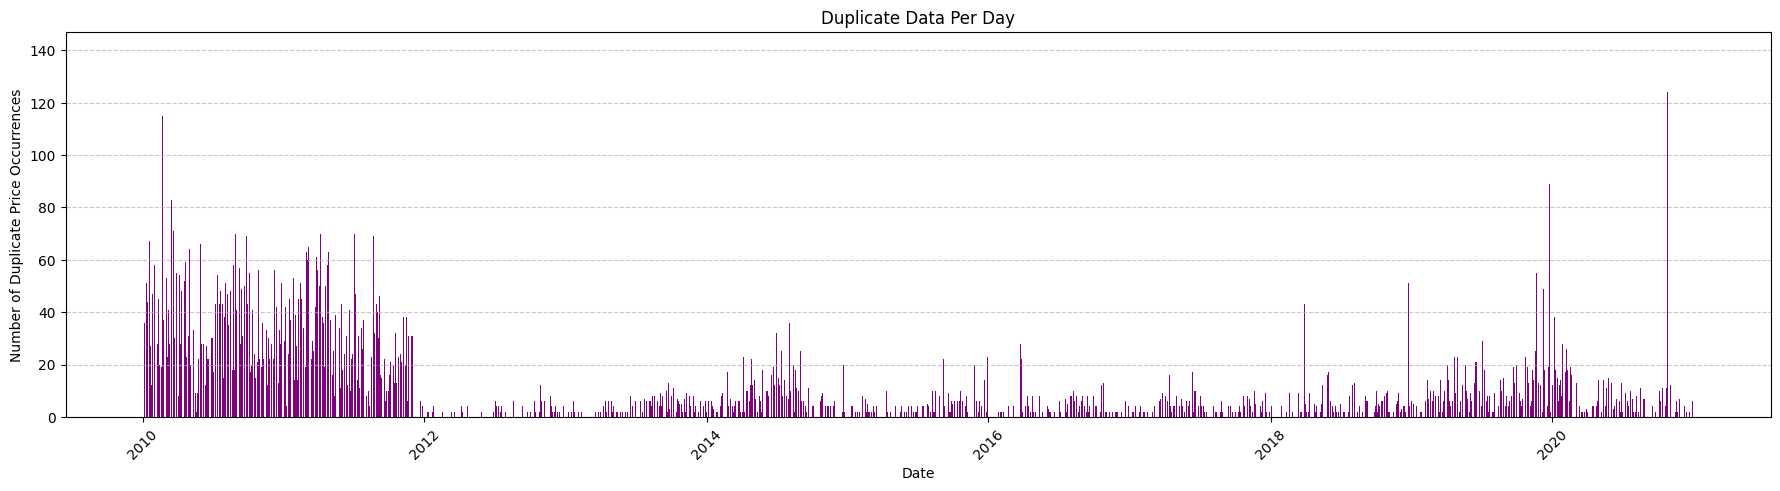

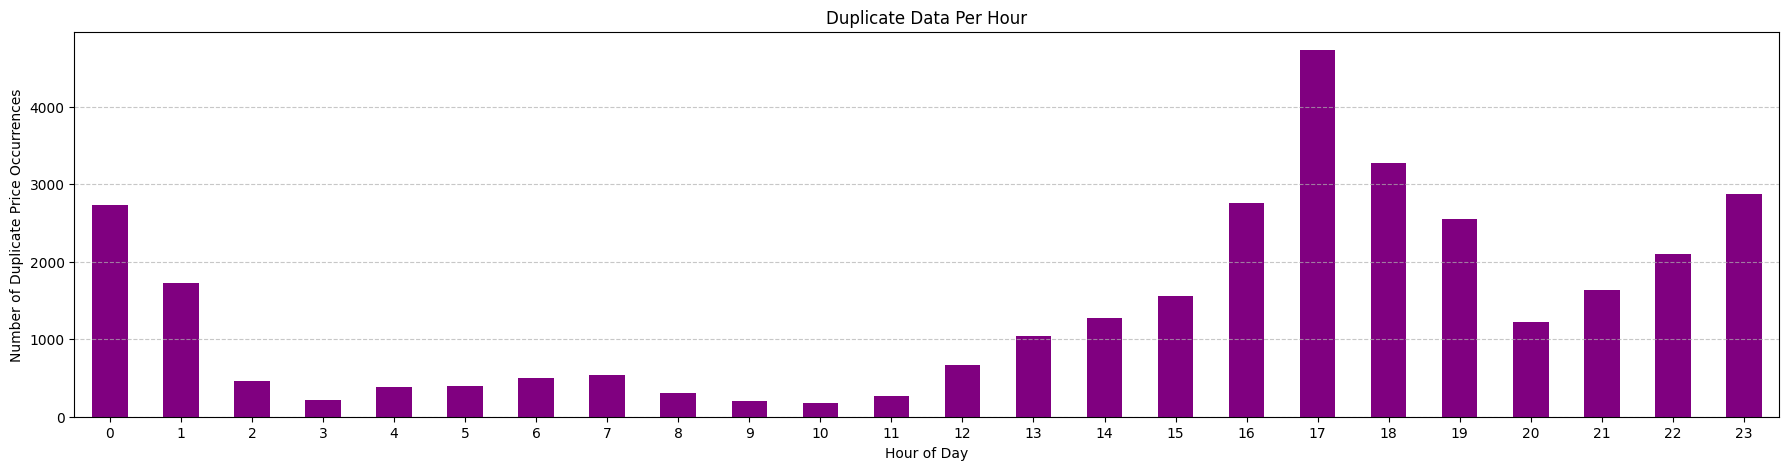

In [31]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# 
plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

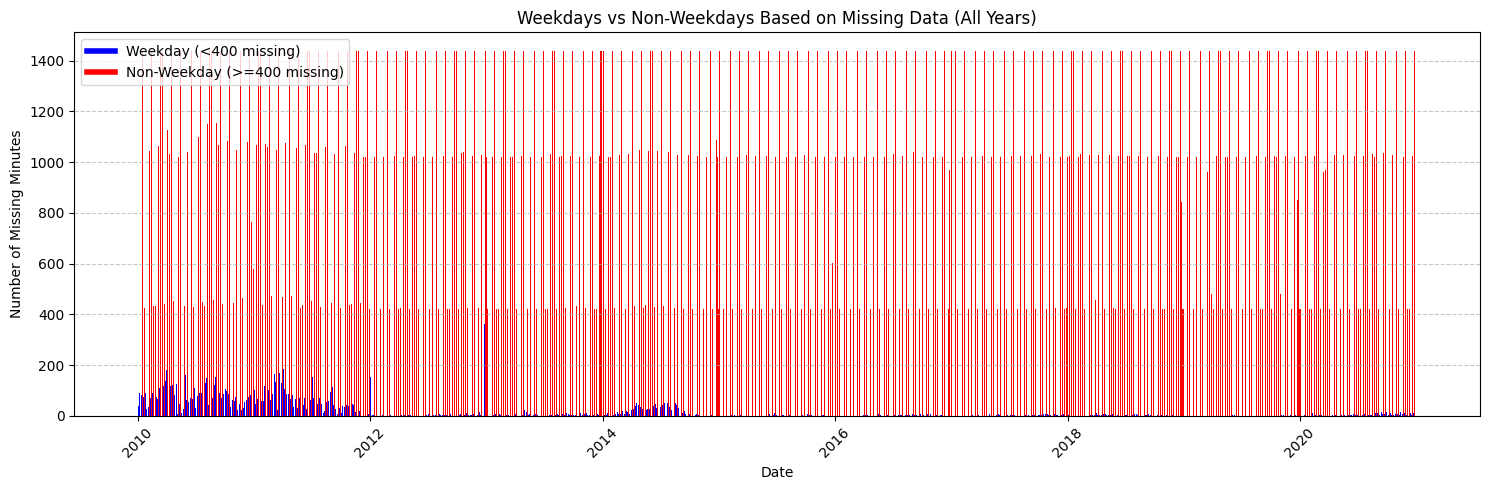

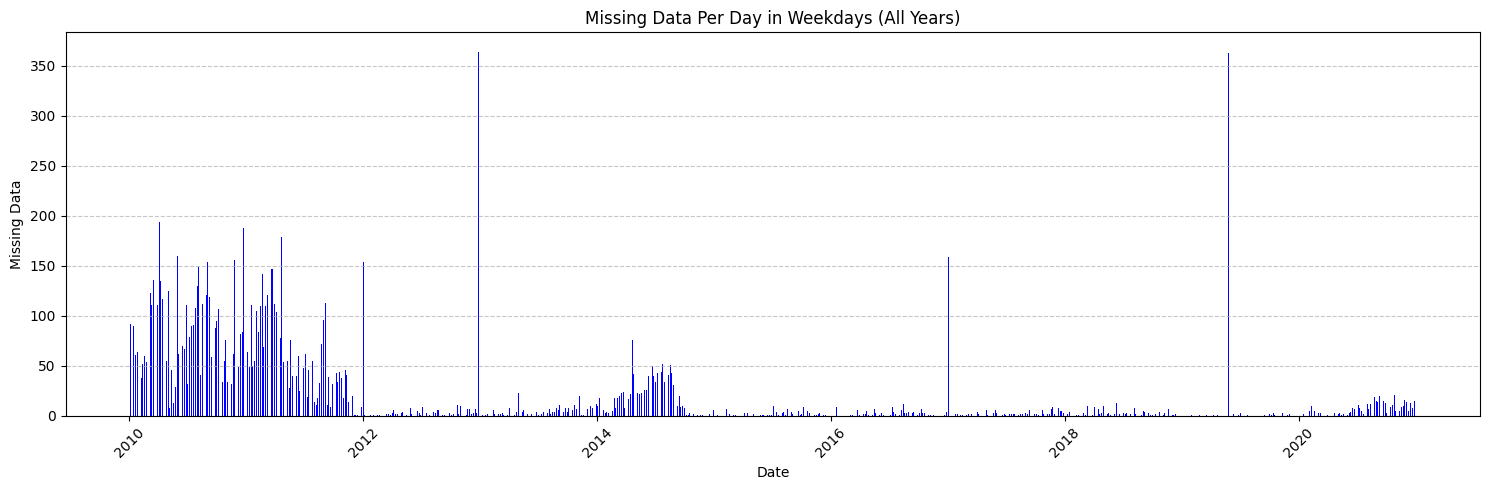

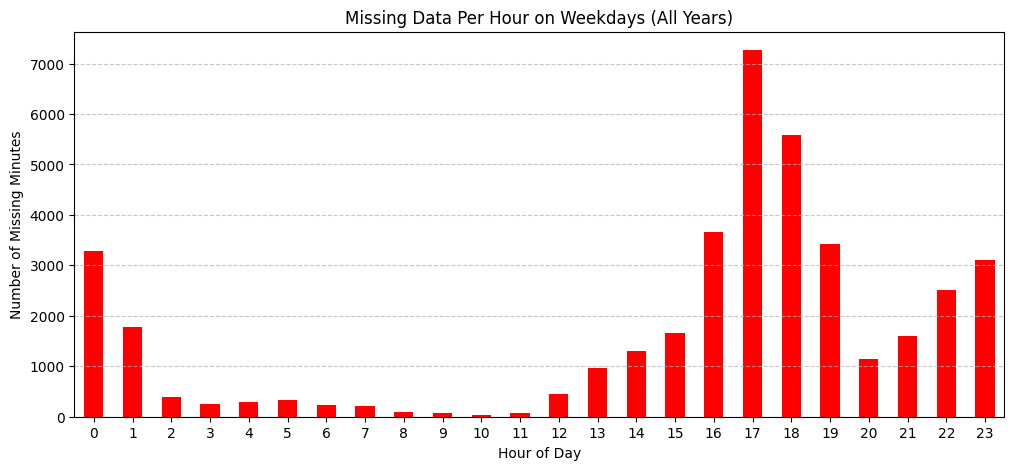

In [32]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index       

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

plt.figure(figsize=(15, 5))
colors = ['blue' if date in weekdays else 'red' for date in missing_per_day.index]
plt.bar(missing_per_day.index, missing_per_day.values, color=colors)

plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Weekday (<400 missing)')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Non-Weekday (>=400 missing)')
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()
plt.show()


weekday_missing_data = missing_per_day[weekdays]
plt.figure(figsize=(15, 5))
plt.bar(weekday_missing_data.index, weekday_missing_data.values, color='blue')

plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [33]:
missing_per_day

DateTime
2010-01-03      40
2010-01-04      92
2010-01-05      98
2010-01-06      90
2010-01-07      96
              ... 
2020-12-27    1031
2020-12-28      15
2020-12-29      18
2020-12-30       3
2020-12-31       0
Name: indicator, Length: 4016, dtype: int64

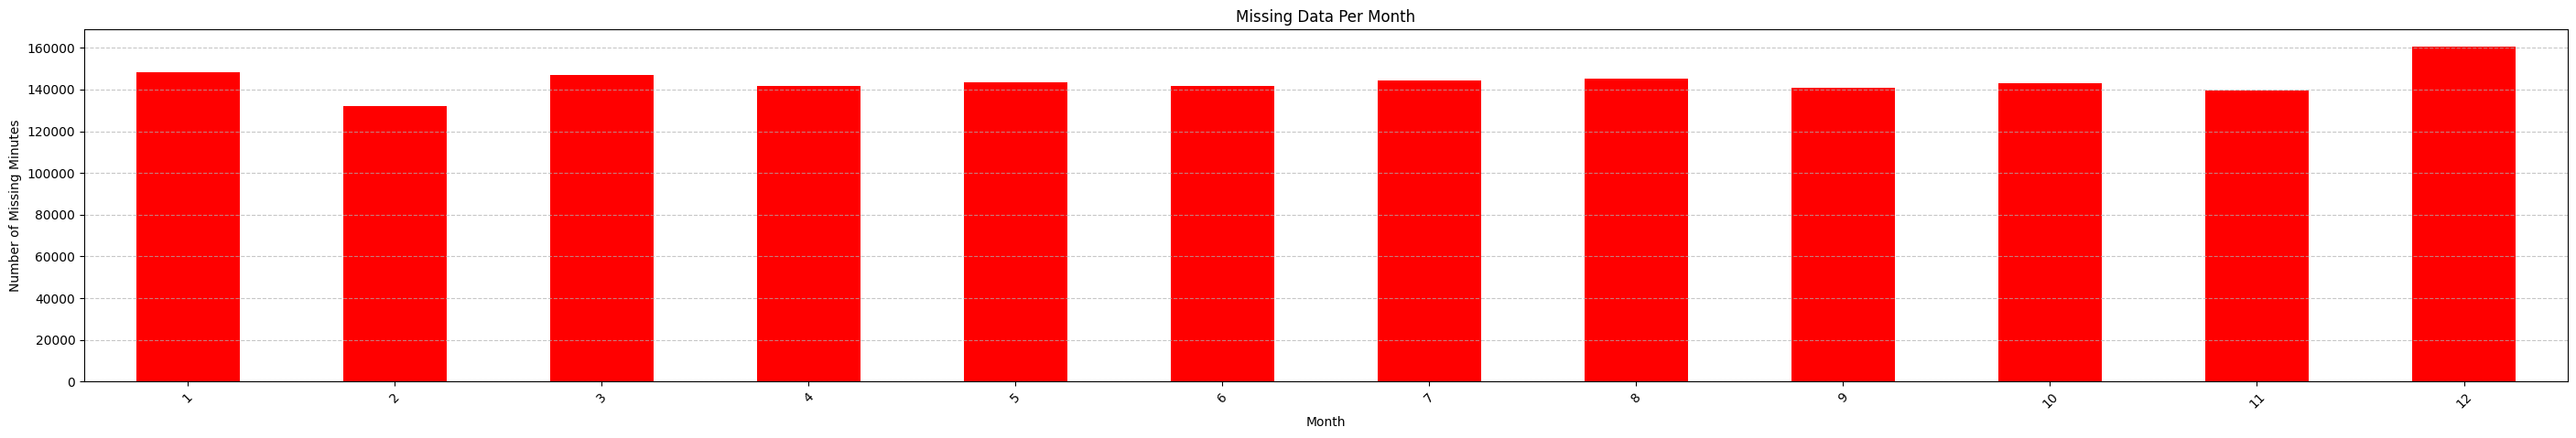

In [34]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [36]:
print(missing_per_month)

DateTime
1     148402
2     131860
3     146965
4     141562
5     143687
6     141651
7     144217
8     145113
9     141014
10    143041
11    139526
12    160747
Name: indicator, dtype: int64


In [37]:
sum(missing_per_month)-(11520*12)

1589545

In [38]:
def remove_all_consecutive_duplicates(df):
    """Remove consecutive OHLC duplicates and flat bars with no price movement"""
    df_clean = df.copy()
    
    while True:
        # Check for consecutive duplicates
        prev_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(1)) & 
            (df_clean['High'] == df_clean['High'].shift(1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(1))
        )
        
        next_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(-1)) & 
            (df_clean['High'] == df_clean['High'].shift(-1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(-1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(-1))
        )
        
        # Check for flat bars (no price movement)
        flat_bar = (
            (df_clean['Open'] == df_clean['High']) & 
            (df_clean['Open'] == df_clean['Low']) & 
            (df_clean['Open'] == df_clean['Close'])
        )
        
        # Combine conditions
        is_duplicate = prev_dup | next_dup | flat_bar
        count = is_duplicate.sum()
        
        if count == 0:
            break
            
        print(f"Marking {count} duplicates and flat bars…")

        # 1) blank out the OHLC
        df_clean.loc[is_duplicate, ['Open','High','Low','Close']] = np.nan
        df_clean.loc[is_duplicate, 'Volume'] = 0
        # 2) flag them
        df_clean.loc[is_duplicate, 'indicator'] = 1
        
    
    
    return df_clean

def remove_duplicate_timestamps(df):
    """
    Remove rows so that every DateTime is unique.
    Keeps the first occurrence of each timestamp and deletes all others.
    """
    df_clean = df.copy()

    while True:
        # Mark all rows whose DateTime appears more than once
        dup_mask = df_clean['DateTime'].duplicated(keep=False)
        if not dup_mask.any():
            break

        # Of those duplicates, keep only the first in each group
        to_remove = df_clean['DateTime'].duplicated(keep='first')
        count = to_remove.sum()
        print(f"Removing {count} rows with duplicate timestamps…")

        df_clean = df_clean.loc[~to_remove].reset_index(drop=True)

    return df_clean

def process_duplicated_data(df):
    """
    Process the DataFrame to remove duplicate timestamps and consecutive duplicates.
    """
    # Remove duplicate timestamps
    df = remove_duplicate_timestamps(df)

    # Remove consecutive duplicates and flat bars
    df = remove_all_consecutive_duplicates(df)

    return df


In [39]:
final_data_clean = process_duplicated_data(combined_df)

Removing 120 rows with duplicate timestamps…
Marking 102314 duplicates and flat bars…


In [40]:
def check_dup(data):
    # Check for consecutive duplicates with previous row
    verify_prev = (
        (data['Open'] == data['Open'].shift(1)) & 
        (data['High'] == data['High'].shift(1)) & 
        (data['Low'] == data['Low'].shift(1)) & 
        (data['Close'] == data['Close'].shift(1))
    )
    
    # Check for consecutive duplicates with next row
    verify_next = (
        (data['Open'] == data['Open'].shift(-1)) & 
        (data['High'] == data['High'].shift(-1)) & 
        (data['Low'] == data['Low'].shift(-1)) & 
        (data['Close'] == data['Close'].shift(-1))
    )
    
    # Check for flat bars (no price movement)
    flat_bar = (
        (data['Open'] == data['High']) & 
        (data['Open'] == data['Low']) & 
        (data['Open'] == data['Close'])
    )
    
    # Count each type of duplicate
    consecutive_dups = (verify_prev | verify_next).sum()
    flat_bars = flat_bar.sum()
    total_dups = (verify_prev | verify_next | flat_bar).sum()
    
    print(f"Consecutive duplicates: {consecutive_dups}")
    print(f"Flat bars (no price movement): {flat_bars}")
    print(f"Total issues: {total_dups}")
    
    return total_dups

In [41]:
check_dup(final_data_clean)

Consecutive duplicates: 0
Flat bars (no price movement): 0
Total issues: 0


np.int64(0)

In [42]:
final_data_clean

,DateTime,Open,High,Low,Close,Volume,indicator
0,2010-01-03 17:00:00,1.43010,1.43040,1.43010,1.43040,0.0,0
1,2010-01-03 17:01:00,NaN,NaN,NaN,NaN,0.0,1
2,2010-01-03 17:02:00,1.43020,1.43030,1.43010,1.43030,0.0,0
3,2010-01-03 17:03:00,NaN,NaN,NaN,NaN,0.0,1
4,2010-01-03 17:04:00,1.43010,1.43020,1.42980,1.43000,0.0,0
...,...,...,...,...,...,...,...
5781594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0
5781595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0
5781596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0
5781597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0


In [43]:
final_data = final_data_clean.copy()
# Ensure 'DateTime' is the index
#final_data.index = pd.to_datetime(final_data.index)

<Axes: >

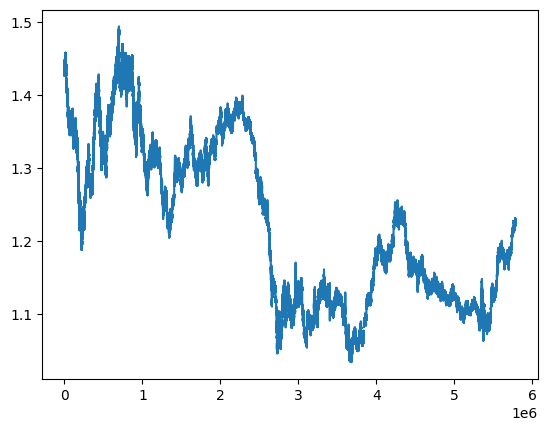

In [44]:
final_data['Close'].plot()    ### plot data nicely including years

In [45]:
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
0,2010-01-03 17:00:00,1.43010,1.43040,1.43010,1.43040,0.0,0
1,2010-01-03 17:01:00,NaN,NaN,NaN,NaN,0.0,1
2,2010-01-03 17:02:00,1.43020,1.43030,1.43010,1.43030,0.0,0
3,2010-01-03 17:03:00,NaN,NaN,NaN,NaN,0.0,1
4,2010-01-03 17:04:00,1.43010,1.43020,1.42980,1.43000,0.0,0
...,...,...,...,...,...,...,...
5781594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0
5781595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0
5781596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0
5781597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0


In [46]:
data = final_data.copy()

In [47]:
data['Close'].iloc[374920:374950].max()

np.float64(1.3095)

In [48]:
data['Close'].nlargest(n=5)

699420    1.4936
699419    1.4932
699374    1.4929
699415    1.4929
699416    1.4929
Name: Close, dtype: float64

In [49]:
max_idx = data['Close'].idxmax()
max_idx

699420

In [50]:
data.loc[max_idx, :] = np.nan

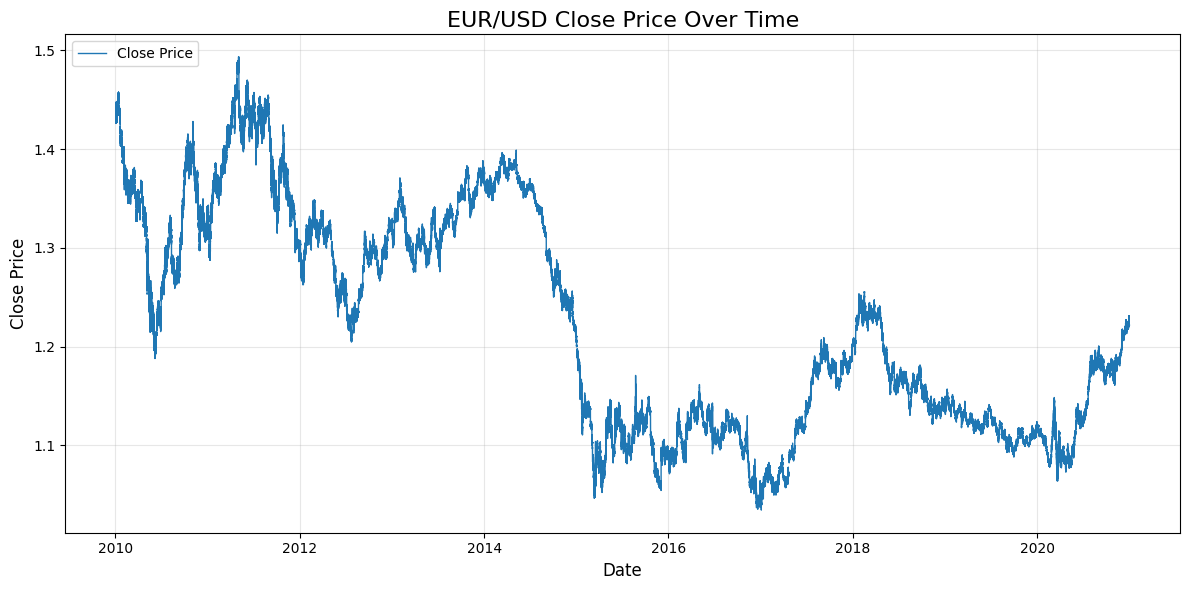

In [51]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2010-01-03 17:00:00,1.43010,1.43040,1.43010,1.43040,0.0,0.0,17.0
1,2010-01-03 17:01:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
2,2010-01-03 17:02:00,1.43020,1.43030,1.43010,1.43030,0.0,0.0,17.0
3,2010-01-03 17:03:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
4,2010-01-03 17:04:00,1.43010,1.43020,1.42980,1.43000,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...
5781594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0.0,16.0
5781595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0.0,16.0
5781596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0.0,16.0
5781597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0.0,16.0


In [53]:
#data.reset_index(inplace=True)

In [54]:
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2010-01-03 17:00:00,1.43010,1.43040,1.43010,1.43040,0.0,0.0,17.0
1,2010-01-03 17:01:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
2,2010-01-03 17:02:00,1.43020,1.43030,1.43010,1.43030,0.0,0.0,17.0
3,2010-01-03 17:03:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
4,2010-01-03 17:04:00,1.43010,1.43020,1.42980,1.43000,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...
5781594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0.0,16.0
5781595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0.0,16.0
5781596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0.0,16.0
5781597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0.0,16.0


In [55]:
#data.drop(columns=['index'], inplace=True)

In [56]:
data.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2010-01-03 17:00:00,1.4301,1.4304,1.4301,1.4304,0.0,0.0,17.0
1,2010-01-03 17:01:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
2,2010-01-03 17:02:00,1.4302,1.4303,1.4301,1.4303,0.0,0.0,17.0
3,2010-01-03 17:03:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
4,2010-01-03 17:04:00,1.4301,1.4302,1.4298,1.4300,0.0,0.0,17.0
5,2010-01-03 17:05:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
6,2010-01-03 17:06:00,1.4301,1.4301,1.4300,1.4301,0.0,0.0,17.0
7,2010-01-03 17:07:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
8,2010-01-03 17:08:00,1.4300,1.4302,1.4300,1.4301,0.0,0.0,17.0
9,2010-01-03 17:09:00,1.4300,1.4301,1.4298,1.4298,0.0,0.0,17.0


In [57]:
# Count how many times each timestamp appears:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])


Series([], Name: count, dtype: int64)


In [96]:
df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
df['mid'] = (df['bid '] + df['ask'])/2

# 1. Make sure your time column is datetime and floor it to the minute
df['time'] = pd.to_datetime(df['time'])
df['minute'] = df['time'].dt.floor('T')

# 2. Assign group_id by “which minute‐bin” each row belongs to
df['group_id'] = df.groupby('minute').ngroup()

# 3. Now compute the OHLC on mid for each group_id
mid_ohlc = (
    df
    .groupby('group_id')
    .agg(
        minute = ('minute', 'first'),
        open   = ('mid',    'first'),
        high   = ('mid',    'max'),
        low    = ('mid',    'min'),
        close  = ('mid',    'last')
    )
    .reset_index()
)

# mid_ohlc now has:
#   group_id | minute           | open      | high      | low       | close
#   -------------------------------------------------------------------------
#     0      | 2025-02-19 08:00 | 609.6209  | 609.6287  | 609.6209  | …
#     1      | 2025-02-19 08:01 | 609.4673  | 609.5114  | 609.4503  | …
#     2      | 2025-02-19 08:02 | …         | …         | …         | …



C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\461763248.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\461763248.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])
C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\461763248.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute'] = df['time'].dt.floor('T')


In [97]:
mid_ohlc

,group_id,minute,open,high,low,close
0,0.0,2025-02-19 08:00:00,609.620921,609.718208,609.435313,609.469308
1,1.0,2025-02-19 08:01:00,609.458008,609.531182,609.437541,609.474540
2,2.0,2025-02-19 08:02:00,609.472416,609.530265,609.427305,609.446263
3,3.0,2025-02-19 08:03:00,609.439725,609.490422,609.400389,609.425303
4,4.0,2025-02-19 08:04:00,609.419199,609.421599,609.263119,609.277285
...,...,...,...,...,...,...
776,776.0,2025-02-19 20:56:00,610.653237,610.653237,610.366333,610.403551
777,777.0,2025-02-19 20:57:00,610.403186,610.421814,610.076369,610.155527
778,778.0,2025-02-19 20:58:00,610.156854,610.246400,610.081910,610.179745
779,779.0,2025-02-19 20:59:00,610.174585,610.208648,610.006565,610.129943


In [98]:
# assuming your per-minute OHLC is in mid_ohlc

# 1. Create `indicator` = 1 if any of open/high/low/close is NaN, else 0
mid_ohlc['indicator'] = (
    mid_ohlc[['open','high','low','close']]
    .isnull()
    .any(axis=1)
    .astype(int)
)

# Now mid_ohlc looks like:
#    group_id  minute              open      high       low      close  indicator
# 0         0 2025-02-19 08:00:00  609.6209  609.7182  609.4353  609.4693          0
# 1         1 2025-02-19 08:01:00  609.4580  609.5312  609.4375  609.4745          0
# ...     ...                 ...       ...       ...       ...       ...
# n       781 2025-02-19 21:01:00       NaN       NaN       NaN       NaN          1


In [103]:
mid_ohlc['DateTime'] = pd.to_datetime(mid_ohlc['minute'])

In [105]:
mid_ohlc = mid_ohlc.drop(columns=['minute'])

In [107]:
# Rename the lowercase OHLC columns to Titlecase
mid_ohlc = mid_ohlc.rename(columns={
    'open':  'Open',
    'high':  'High',
    'low':   'Low',
    'close': 'Close'
})

# Add a Volume column, all zeros (same length as mid_ohlc)
mid_ohlc['Volume'] = 0

In [117]:
mid_ohlc['Close'].std()

np.float64(1.153493339611402)

In [58]:
#######   RVOLATILITY CALCULATION   #######

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data.reset_index(inplace=True)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    data = data.groupby(pd.Grouper(key='DateTime', freq=f'{minute_interval}Min',closed='right',label='right')).agg({
                                          "Open":  "first",
                                          "High":  "max",
                                          "Low":   "min",
                                         "Close": "last",
                                          "Volume": "sum",
                                          "indicator": "sum",
                                          "group_id": "mean"
                                          
                                          })
    return data

def filter_incomplete_groups(ohlc_data, timeframe, threshold):
    """
    Filter out minutes within daily groups that exceed missing data threshold.
    
    Parameters:
    - ohlc_data: Minutely data with an indicator column (1 = missing, 0 = present)
    - timeframe: Largest grouping interval (typically daily)
    - threshold: Maximum allowed missing minutes within the daily group
    
    Returns:
    - Filtered minutely data
    """
    
    ohlc_data['DateTime'] = pd.to_datetime(ohlc_data['DateTime'], format='%Y%m%d %H%M%S')
    ohlc_data = ohlc_data.set_index('DateTime')
    print(ohlc_data)
    # Group by the largest timeframe
    ohlc_data['group_id'] = (
        ohlc_data
        .groupby(pd.Grouper(freq=f"{timeframe}T"))
        .ngroup()
        + 1
    )
    
    # 3) count missing per group
    missing_minutes_per_timeframe = ohlc_data.groupby('group_id')['indicator'].sum()
    
    # Calculate threshold count for missing minutes per timeframe
    threshold_count = timeframe * threshold
    
    # Identify days with too many missing minutes
    timeframes_to_remove = missing_minutes_per_timeframe[missing_minutes_per_timeframe > threshold_count].index
    
    # Filter out ALL minutes for timeframes exceeding the missing data threshold 
    filtered_data = ohlc_data[~ohlc_data['group_id'].isin(timeframes_to_remove)].copy()
    
    missing_minutes_per_timeframe_after_filter = filtered_data.groupby('group_id')['indicator'].sum()
    
    # Optional: Print diagnostic information
    print(f"Original data shape: {ohlc_data.shape}")
    print(f"Threshold value: {threshold} ({threshold_count} points)")
    print(f"Filtered data shape: {filtered_data.shape}")
    print(f"timeframes removed: {len(timeframes_to_remove)}")
    print(f"Total timeframes: {len(missing_minutes_per_timeframe)}")
    
    #Plot
    '''
    plt.figure(figsize=(15, 5))
    missing_minutes_per_timeframe.plot(kind='bar', color='blue')
    plt.title('Missing Minutes Per Timeframe')
    plt.xlabel('DateTime')
    plt.ylabel('Missing Data')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()'''
    
    plt.figure(figsize=(15, 5))
    missing_minutes_per_timeframe_after_filter.plot(kind='bar', color='blue')
    plt.title('Missing Minutes Per Timeframe')
    plt.xlabel('DateTime')
    plt.ylabel('Missing Data')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    return filtered_data

def compute_volatility_measure(ohlc_data, vol_measure):
    """
    Calculate volatility using the specified method.
    
    Parameters:
    - ohlc_data (pd.DataFrame): OHLC data
    - vol_measure (str): Volatility measure ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close')
    
    Returns:
    - ohlc_data (pd.DataFrame): OHLC data with volatility measure added
    """
    # Make a copy to avoid modifying the input
    ohlc_data = ohlc_data.copy()
    
    # Constant for Garman-Klass
    k = 2 * np.log(2) - 1
    
    # Compute volatility measures (Variance)
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - \
                       k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    
    elif vol_measure == 'Rogers-Satchell':
        # Create a 'Prev_Close' column initialized with NaN
        ohlc_data['Prev_Close'] = ohlc_data['Close'].shift(1)
        # Now compute Rogers–Satchell using Prev_Close (as before)
        ohlc_data['V'] = (
            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['High']  / ohlc_data['Close'])      +
            np.log(ohlc_data['Low']   / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['Low']   / ohlc_data['Close'])
        )

                        
    
    elif vol_measure == 'Close-to-Close':
        ohlc_data['Log_Returns'] = np.log(ohlc_data['Close'] / ohlc_data['Close'].shift(1))
        ohlc_data['V'] = ohlc_data['Log_Returns'] ** 2
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")
    
    return ohlc_data

def setup_rvol_col(data, timeframe, vol_measure):
    """
    The overall purpose is to:
    1. Compute variance contributions for each row
    2. Calculate realized volatility for each group
    3. Attach the group's volatility to every row in that group
    """
    # 1) Compute per-bar variance contributions (V) for each row
    v_by_group = data.groupby('group_id')\
                     .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
    
    # If it came back as a DataFrame, pick its 'V' column
    if isinstance(v_by_group, pd.DataFrame):
        v_series = v_by_group['V']
    else:
        v_series = v_by_group
    
    # Ensure index is consistent
    v_series = v_series.reset_index(level=0, drop=True)
    
    # 2) Attach per-bar V back onto a copy of your DataFrame
    df = data.copy()
    df['V'] = np.nan  # Preallocate
    df.loc[v_series.index, 'V'] = v_series
    
    # 3) Compute per-group sum of V and count of rows
    grp_stats = (
        df
        .groupby('group_id')['V']
        .agg(sum='sum', count='count')
    )

    # Add the n_minus_1 column
    grp_stats['n_minus_1'] = grp_stats['count'] - 1

    # Sample variance using (n_minus_1)
    grp_stats['var'] = np.where(
        grp_stats['n_minus_1'] > 0,
        grp_stats['sum'] / grp_stats['n_minus_1'],
        np.nan
    )

    # 4) √variance → realized vol, annualize as before
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    annualized_rvol = rvol_per_group * np.sqrt(252 * 24 * 60/ timeframe)

    # 5) Map both back onto every row
    df[col_name]    = df['group_id'].map(annualized_rvol)*100
    df['n_minus_1'] = df['group_id'].map(grp_stats['n_minus_1'])
    

    return df
    
    
    
    
##TODO: Look into Garman-Klass and adjust diving it by (1/2T-1) instead of (n-1) 
##TODO: Look into CLOSE-CLOSE and add logic, if next period (t) = Nan, then use t+1 period open.
##TODO: Replace 'open' of RS with previous available period rvol 'close', include a stop limit



def plot_realized_volatility(rvol_df, vol_measure, timeframe):
    """
    Plot realized volatility over time.
    
    Parameters:
    - rvol_df (pd.DataFrame): DataFrame with realized volatility values
    - vol_measure (str): Volatility measure used
    - timeframe (int): Timeframe used for calculation
    """
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    
    plt.figure(figsize=(30, 15))
    plt.scatter(rvol_df['EndDateTime'], rvol_df[col_name], 
               label=f'Realized Volatility ({vol_measure}, {timeframe} min)', 
               color='b', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility')
    plt.title(f'Realized Volatility Over Time ({vol_measure}, {timeframe} min)')
    plt.legend()
    plt.grid(True)
    plt.show()

def preprocess_by_group_id(rvol, vol_title):
    # Ensure 'DateTime' is in datetime format
    if isinstance(rvol.index, pd.DatetimeIndex):
        rvol.reset_index(inplace=True)
    
    # Convert DateTime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(rvol['DateTime']):
        rvol['DateTime'] = pd.to_datetime(rvol['DateTime'])
    
    # Group by group_id
    grouped = rvol.groupby('group_id')
    
    # Aggregate the data
    aggregated = grouped.agg({
        "DateTime": ["first", "last"],  # Keep first and last datetime for reference
        "Open": "first",                # First price in the group
        "High": "max",                  # Highest price in the group
        "Low": "min",                   # Lowest price in the group
        "Close": "last",                # Last price in the group
        "Volume": "sum",                # Sum of volume
        "indicator": "sum",             # Sum of indicator
        'n_minus_1': "mean",             # Mean of n_minus_1
    })
    
    # Add vol_title aggregation explicitly
    aggregated[vol_title] = grouped[vol_title].mean()
    
    # Flatten multi-level column names
    aggregated.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in aggregated.columns]
    
    # Rename datetime columns for clarity
    aggregated.rename(columns={
        'DateTime_first': 'StartDateTime',
        'DateTime_last': 'EndDateTime'
    }, inplace=True)
    
    # Reset index to make group_id a regular column
    aggregated.reset_index(inplace=True)
    
    return aggregated

def calculate_rvol(data, vol_measure, timeframe, minute_interval, threshold, vol_title, plot=True):
    """
    Main function to compute realized volatility (rVol) with preprocessing to handle missing data.
    
    Parameters:
    - data (pd.DataFrame): A dataframe with 'DateTime' column and OHLC prices.
    - vol_measure (str): The volatility measure to use ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close').
    - timeframe (int): The time window for realized volatility (must be a multiple of 60 minutes).
    - minute_interval (int): The granularity of minute data (1, 5, 10, etc.).
    - threshold (float): The threshold (percentage) of missing data above which the group is dropped.
    - plot (bool): Whether to plot the realized volatility.
    - debug (bool): Whether to print debugging information.
    
    Returns:
    - rvol_df (pd.DataFrame): A dataframe containing the calculated realized volatility.
    """
    # Input validation
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    
    # Step 1: Filter incomplete timeframe groups
    filtered_ohlc_data = filter_incomplete_groups(data, timeframe, threshold)
    
    # Step 2: Preprocess data
    grouped_ohlc_data = preprocess_ohlc_data(filtered_ohlc_data, minute_interval)
    
    # Step 3: Compute volatility measures
    compute_volatility_measure(grouped_ohlc_data, vol_measure)
    
    # Step 4: Aggregate into realized volatility
    rvol_df1 = setup_rvol_col(grouped_ohlc_data, timeframe, vol_measure)
    print(rvol_df1)
    # Step 5: Preprocess by group_id
    rvol_df = preprocess_by_group_id(rvol_df1, vol_title = vol_title)
    print(rvol_df)
    
    # Step 6: Plot if requested
    if plot:
        plot_realized_volatility(rvol_df, vol_measure, timeframe)
        
    
    return rvol_df

In [157]:
df = mid_ohlc.iloc[0:120].copy()
df['logret'] = np.log(df['Close'] / df['Close'].shift(1))
daily_std = df['logret'].std(ddof=1)
annual_vol = daily_std * np.sqrt(252*12)  

print(f"Daily vol ≈ {daily_std:.4%}")
print(f"Annual vol ≈ {annual_vol:.2%}")

Daily vol ≈ 0.0201%
Annual vol ≈ 1.10%


                     group_id        Open        High         Low       Close  \
DateTime                                                                        
2025-02-19 08:00:00       0.0  609.620921  609.718208  609.435313  609.469308   
2025-02-19 08:01:00       1.0  609.458008  609.531182  609.437541  609.474540   
2025-02-19 08:02:00       2.0  609.472416  609.530265  609.427305  609.446263   
2025-02-19 08:03:00       3.0  609.439725  609.490422  609.400389  609.425303   
2025-02-19 08:04:00       4.0  609.419199  609.421599  609.263119  609.277285   
...                       ...         ...         ...         ...         ...   
2025-02-19 20:56:00     776.0  610.653237  610.653237  610.366333  610.403551   
2025-02-19 20:57:00     777.0  610.403186  610.421814  610.076369  610.155527   
2025-02-19 20:58:00     778.0  610.156854  610.246400  610.081910  610.179745   
2025-02-19 20:59:00     779.0  610.174585  610.208648  610.006565  610.129943   
2025-02-19 21:00:00     780.

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\1416248604.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


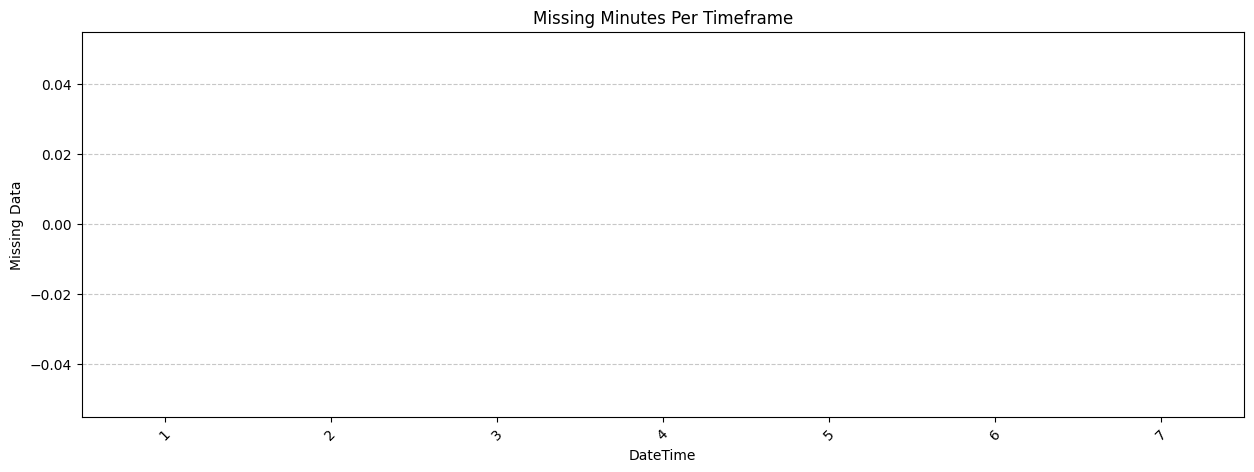

                           Open        High         Low       Close  Volume  \
DateTime                                                                      
2025-02-19 08:00:00  609.620921  609.718208  609.435313  609.469308       0   
2025-02-19 08:01:00  609.458008  609.531182  609.437541  609.474540       0   
2025-02-19 08:02:00  609.472416  609.530265  609.427305  609.446263       0   
2025-02-19 08:03:00  609.439725  609.490422  609.400389  609.425303       0   
2025-02-19 08:04:00  609.419199  609.421599  609.263119  609.277285       0   
...                         ...         ...         ...         ...     ...   
2025-02-19 20:56:00  610.653237  610.653237  610.366333  610.403551       0   
2025-02-19 20:57:00  610.403186  610.421814  610.076369  610.155527       0   
2025-02-19 20:58:00  610.156854  610.246400  610.081910  610.179745       0   
2025-02-19 20:59:00  610.174585  610.208648  610.006565  610.129943       0   
2025-02-19 21:00:00  610.140808  610.146115  610.140

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\1416248604.py:145: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


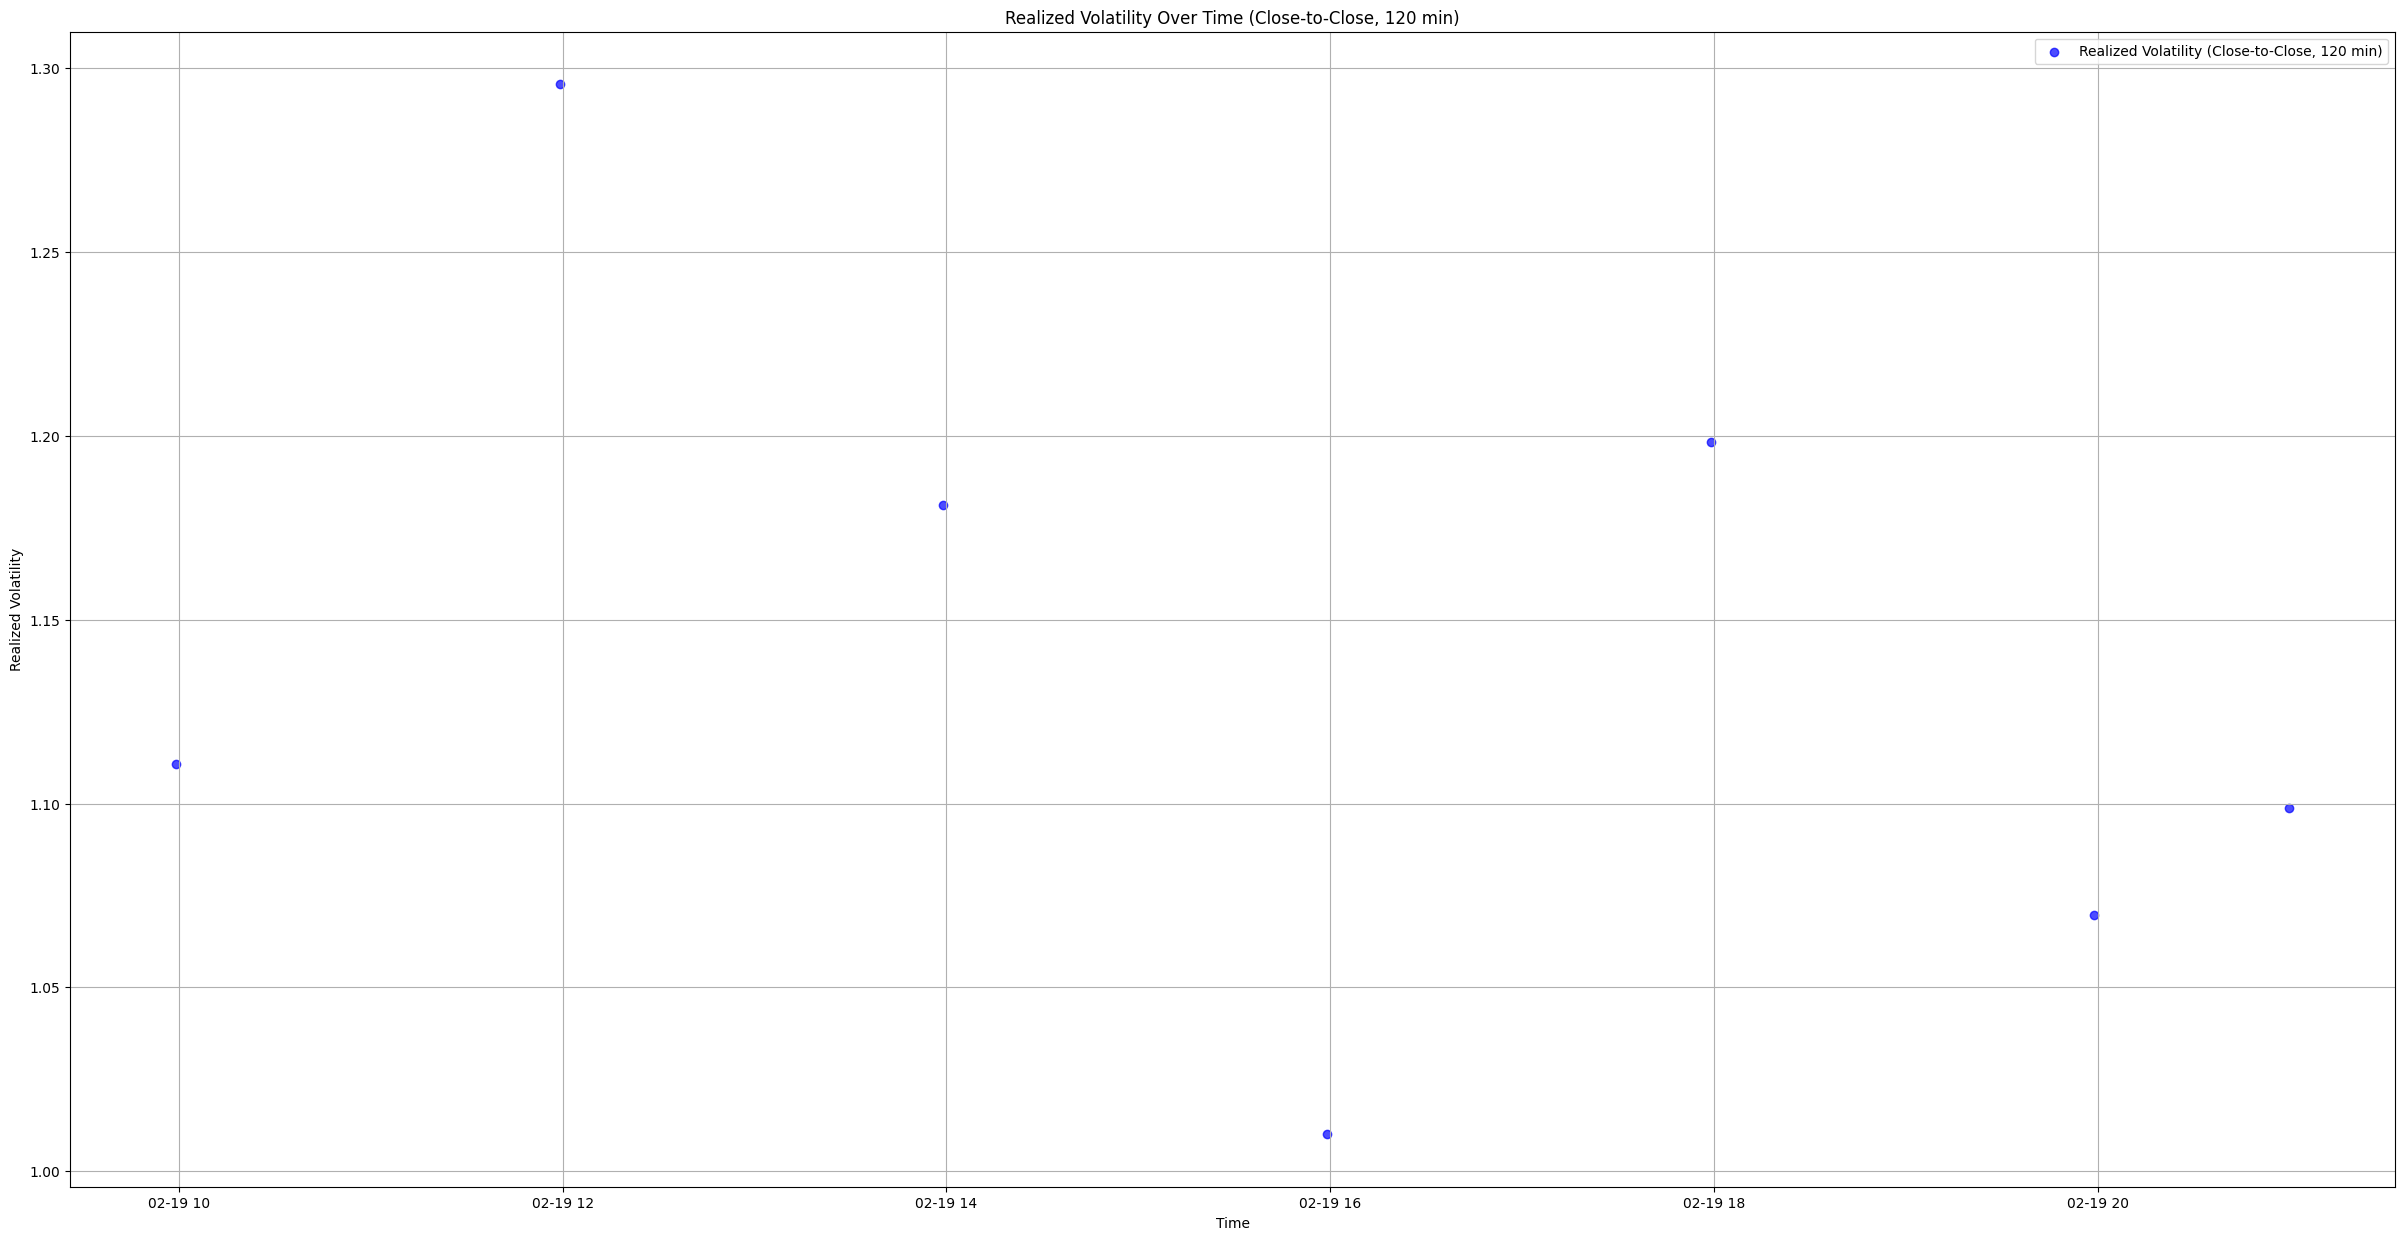

In [154]:
CC_120m_rvol_mid_ohlc = calculate_rvol(mid_ohlc, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [155]:
CC_120m_rvol_mid_ohlc

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Close-to-Close
0,1.0,2025-02-19 08:00:00,2025-02-19 09:59:00,609.620921,610.467443,607.740068,607.947937,0,0,118.0,1.110820
1,2.0,2025-02-19 10:00:00,2025-02-19 11:59:00,607.944677,608.213899,606.462187,607.811917,0,0,118.0,1.295689
2,3.0,2025-02-19 12:00:00,2025-02-19 13:59:00,607.804411,608.523004,607.118524,608.017532,0,0,118.0,1.181268
3,4.0,2025-02-19 14:00:00,2025-02-19 15:59:00,608.029889,609.237044,607.935626,608.605703,0,0,118.0,1.010047
4,5.0,2025-02-19 16:00:00,2025-02-19 17:59:00,608.613320,610.429396,608.458203,610.007987,0,0,118.0,1.198444
5,6.0,2025-02-19 18:00:00,2025-02-19 19:59:00,610.000437,611.040874,609.742204,610.933327,0,0,118.0,1.069798
6,7.0,2025-02-19 20:00:00,2025-02-19 21:00:00,610.933539,611.136012,610.006565,610.146115,0,0,59.0,1.098816


In [156]:
CC_120m_rvol_mid_ohlc['RVol_120min_Close-to-Close'].mean()

np.float64(1.1378402107409533)

In [60]:
'''# 3) Compute sample variance per group: sum(V) / (n - 1)
    grp_stats = df.groupby('group_id')['V']\
                  .agg(['sum', 'count'])
    
    # Adjust for groups with insufficient data
    grp_stats['var'] = np.where(
        grp_stats['count'] > 1, 
        grp_stats['sum'] / (grp_stats['count'] - 1), 
        np.nan
    )
    
    # 4) Take square root → realized volatility per group
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    
    annualized_rvol = rvol_per_group * np.sqrt(252 * 24 * 60 / timeframe)
    
    # 5) Broadcast that single vol back onto every row
    df[col_name] = df['group_id'].map(annualized_rvol)'''

"# 3) Compute sample variance per group: sum(V) / (n - 1)\n    grp_stats = df.groupby('group_id')['V']                  .agg(['sum', 'count'])\n    \n    # Adjust for groups with insufficient data\n    grp_stats['var'] = np.where(\n        grp_stats['count'] > 1, \n        grp_stats['sum'] / (grp_stats['count'] - 1), \n        np.nan\n    )\n    \n    # 4) Take square root → realized volatility per group\n    col_name = f'RVol_{timeframe}min_{vol_measure}'\n    rvol_per_group = np.sqrt(grp_stats['var'])\n    \n    annualized_rvol = rvol_per_group * np.sqrt(252 * 24 * 60 / timeframe)\n    \n    # 5) Broadcast that single vol back onto every row\n    df[col_name] = df['group_id'].map(annualized_rvol)"

                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0        0.0   
2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0        0.0   
2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0        0.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\3694791369.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (5781599, 8)
Threshold value: 0.1 (12.0 points)
Filtered data shape: (3614939, 8)
timeframes removed: 18056
Total timeframes: 48181


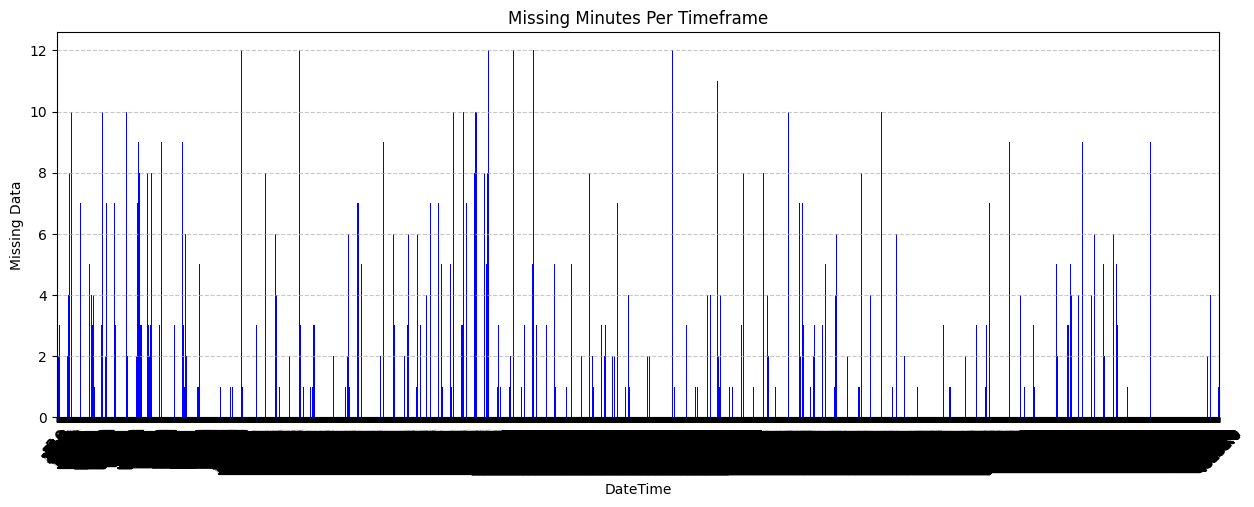

In [61]:
test = filter_incomplete_groups(data, 120, 0.1)

In [62]:
'''
    elif vol_measure == 'Rogers-Satchell':
        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Open']) * 
                        np.log(ohlc_data['High'] / ohlc_data['Close']) +
                        np.log(ohlc_data['Low'] / ohlc_data['Open']) * 
                        np.log(ohlc_data['Low'] / ohlc_data['Close']))'''

"\n    elif vol_measure == 'Rogers-Satchell':\n        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Open']) * \n                        np.log(ohlc_data['High'] / ohlc_data['Close']) +\n                        np.log(ohlc_data['Low'] / ohlc_data['Open']) * \n                        np.log(ohlc_data['Low'] / ohlc_data['Close']))"

In [63]:
'''elif vol_measure == 'Rogers-Satchell':
        # Create a 'Prev_Close' column initialized with NaN
        ohlc_data['Prev_Close'] = np.nan

        for i in range(1, len(ohlc_data)):
            j = i - 1
            steps = 0
            # Walk backward up to 5 bars looking for a non-NaN close
            while j >= 0 and np.isnan(ohlc_data['Close'].iat[j]) and steps < 5:
                j -= 1
                steps += 1

            if j >= 0 and not np.isnan(ohlc_data['Close'].iat[j]):
                # Found a valid close within 5 steps
                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Close'].iat[j]
            else:
                # Either ran out of history or looked back >5, so use this bar's Open
                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Open'].iat[i]

        # Now compute Rogers–Satchell using Prev_Close (as before)
        ohlc_data['V'] = (
            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['High']  / ohlc_data['Close'])      +
            np.log(ohlc_data['Low']   / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['Low']   / ohlc_data['Close'])
        )'''

"elif vol_measure == 'Rogers-Satchell':\n        # Create a 'Prev_Close' column initialized with NaN\n        ohlc_data['Prev_Close'] = np.nan\n\n        for i in range(1, len(ohlc_data)):\n            j = i - 1\n            steps = 0\n            # Walk backward up to 5 bars looking for a non-NaN close\n            while j >= 0 and np.isnan(ohlc_data['Close'].iat[j]) and steps < 5:\n                j -= 1\n                steps += 1\n\n            if j >= 0 and not np.isnan(ohlc_data['Close'].iat[j]):\n                # Found a valid close within 5 steps\n                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Close'].iat[j]\n            else:\n                # Either ran out of history or looked back >5, so use this bar's Open\n                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Open'].iat[i]\n\n        # Now compute Rogers–Satchell using Prev_Close (as before)\n        ohlc_data['V'] = (\n            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *\n            np.l

In [64]:
#disregard this part, it is not used in the code

'''elif vol_measure == 'Rogers-Satchell':
        # Create a 'Prev_Close' column initialized with NaN
        ohlc_data['Prev_Close'] = np.nan 
        
        

        # Iterate over the data and fill 'Prev_Close' with the previous available non-NaN close
        for i in range(1, len(ohlc_data)):
            if np.isnan(ohlc_data['Prev_Close'].iloc[i]):
                # Start from the current row and move backward to find the previous non-NaN close
                j = i - 1
                while j >= 0 and np.isnan(ohlc_data['Close'].iloc[j]):
                    j -= 1
                
                # If a valid previous close is found, update the Prev_Close column
                if j >= 0:
                    ohlc_data['Prev_Close'].iloc[i] = ohlc_data['Close'].iloc[j]

        # Now apply the Rogers-Satchell volatility calculation with the updated 'Prev_Close'
        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Prev_Close']) *
                        np.log(ohlc_data['High'] / ohlc_data['Close']) +
                        np.log(ohlc_data['Low'] / ohlc_data['Prev_Close']) *
                        np.log(ohlc_data['Low'] / ohlc_data['Close']))'''

"elif vol_measure == 'Rogers-Satchell':\n        # Create a 'Prev_Close' column initialized with NaN\n        ohlc_data['Prev_Close'] = np.nan \n        \n        \n\n        # Iterate over the data and fill 'Prev_Close' with the previous available non-NaN close\n        for i in range(1, len(ohlc_data)):\n            if np.isnan(ohlc_data['Prev_Close'].iloc[i]):\n                # Start from the current row and move backward to find the previous non-NaN close\n                j = i - 1\n                while j >= 0 and np.isnan(ohlc_data['Close'].iloc[j]):\n                    j -= 1\n                \n                # If a valid previous close is found, update the Prev_Close column\n                if j >= 0:\n                    ohlc_data['Prev_Close'].iloc[i] = ohlc_data['Close'].iloc[j]\n\n        # Now apply the Rogers-Satchell volatility calculation with the updated 'Prev_Close'\n        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Prev_Close']) *\n                  

                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0        0.0   
2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0        0.0   
2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0        0.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\3694791369.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (5781599, 8)
Threshold value: 0.1 (12.0 points)
Filtered data shape: (3614939, 8)
timeframes removed: 18056
Total timeframes: 48181


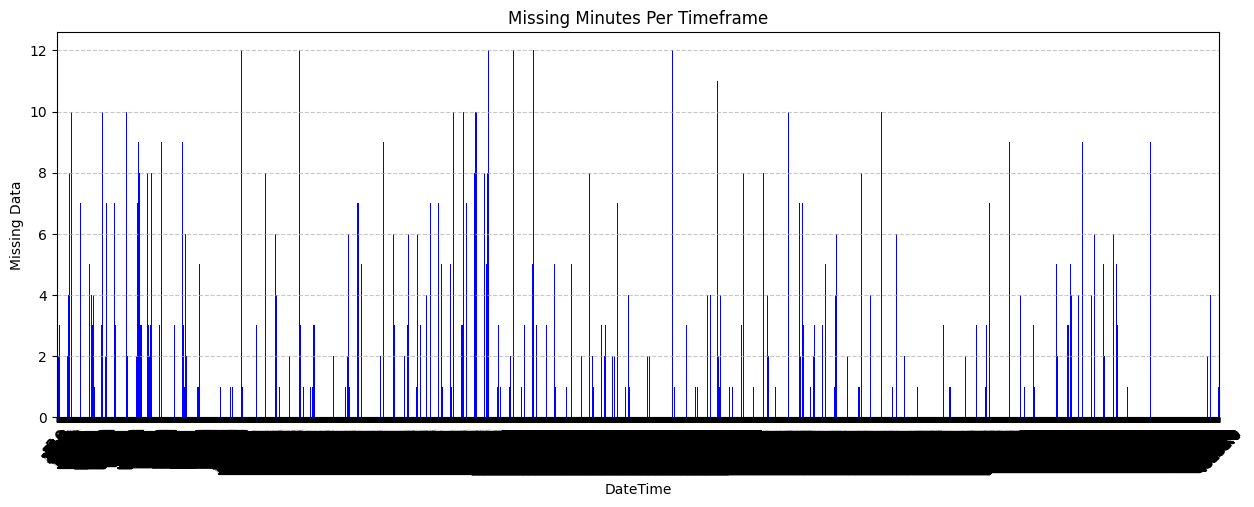

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\3694791369.py:140: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-04 02:00:00  1.42970  1.42980  1.42890  1.42890     0.0        0.0   
2010-01-04 02:01:00  1.42900  1.42910  1.42880  1.42890     0.0        0.0   
2010-01-04 02:02:00  1.42900  1.42900  1.42870  1.42870     0.0        0.0   
2010-01-04 02:03:00  1.42860  1.42870  1.42830  1.42850     0.0        0.0   
2010-01-04 02:04:00  1.42860  1.42860  1.42850  1.42860     0.0        0.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

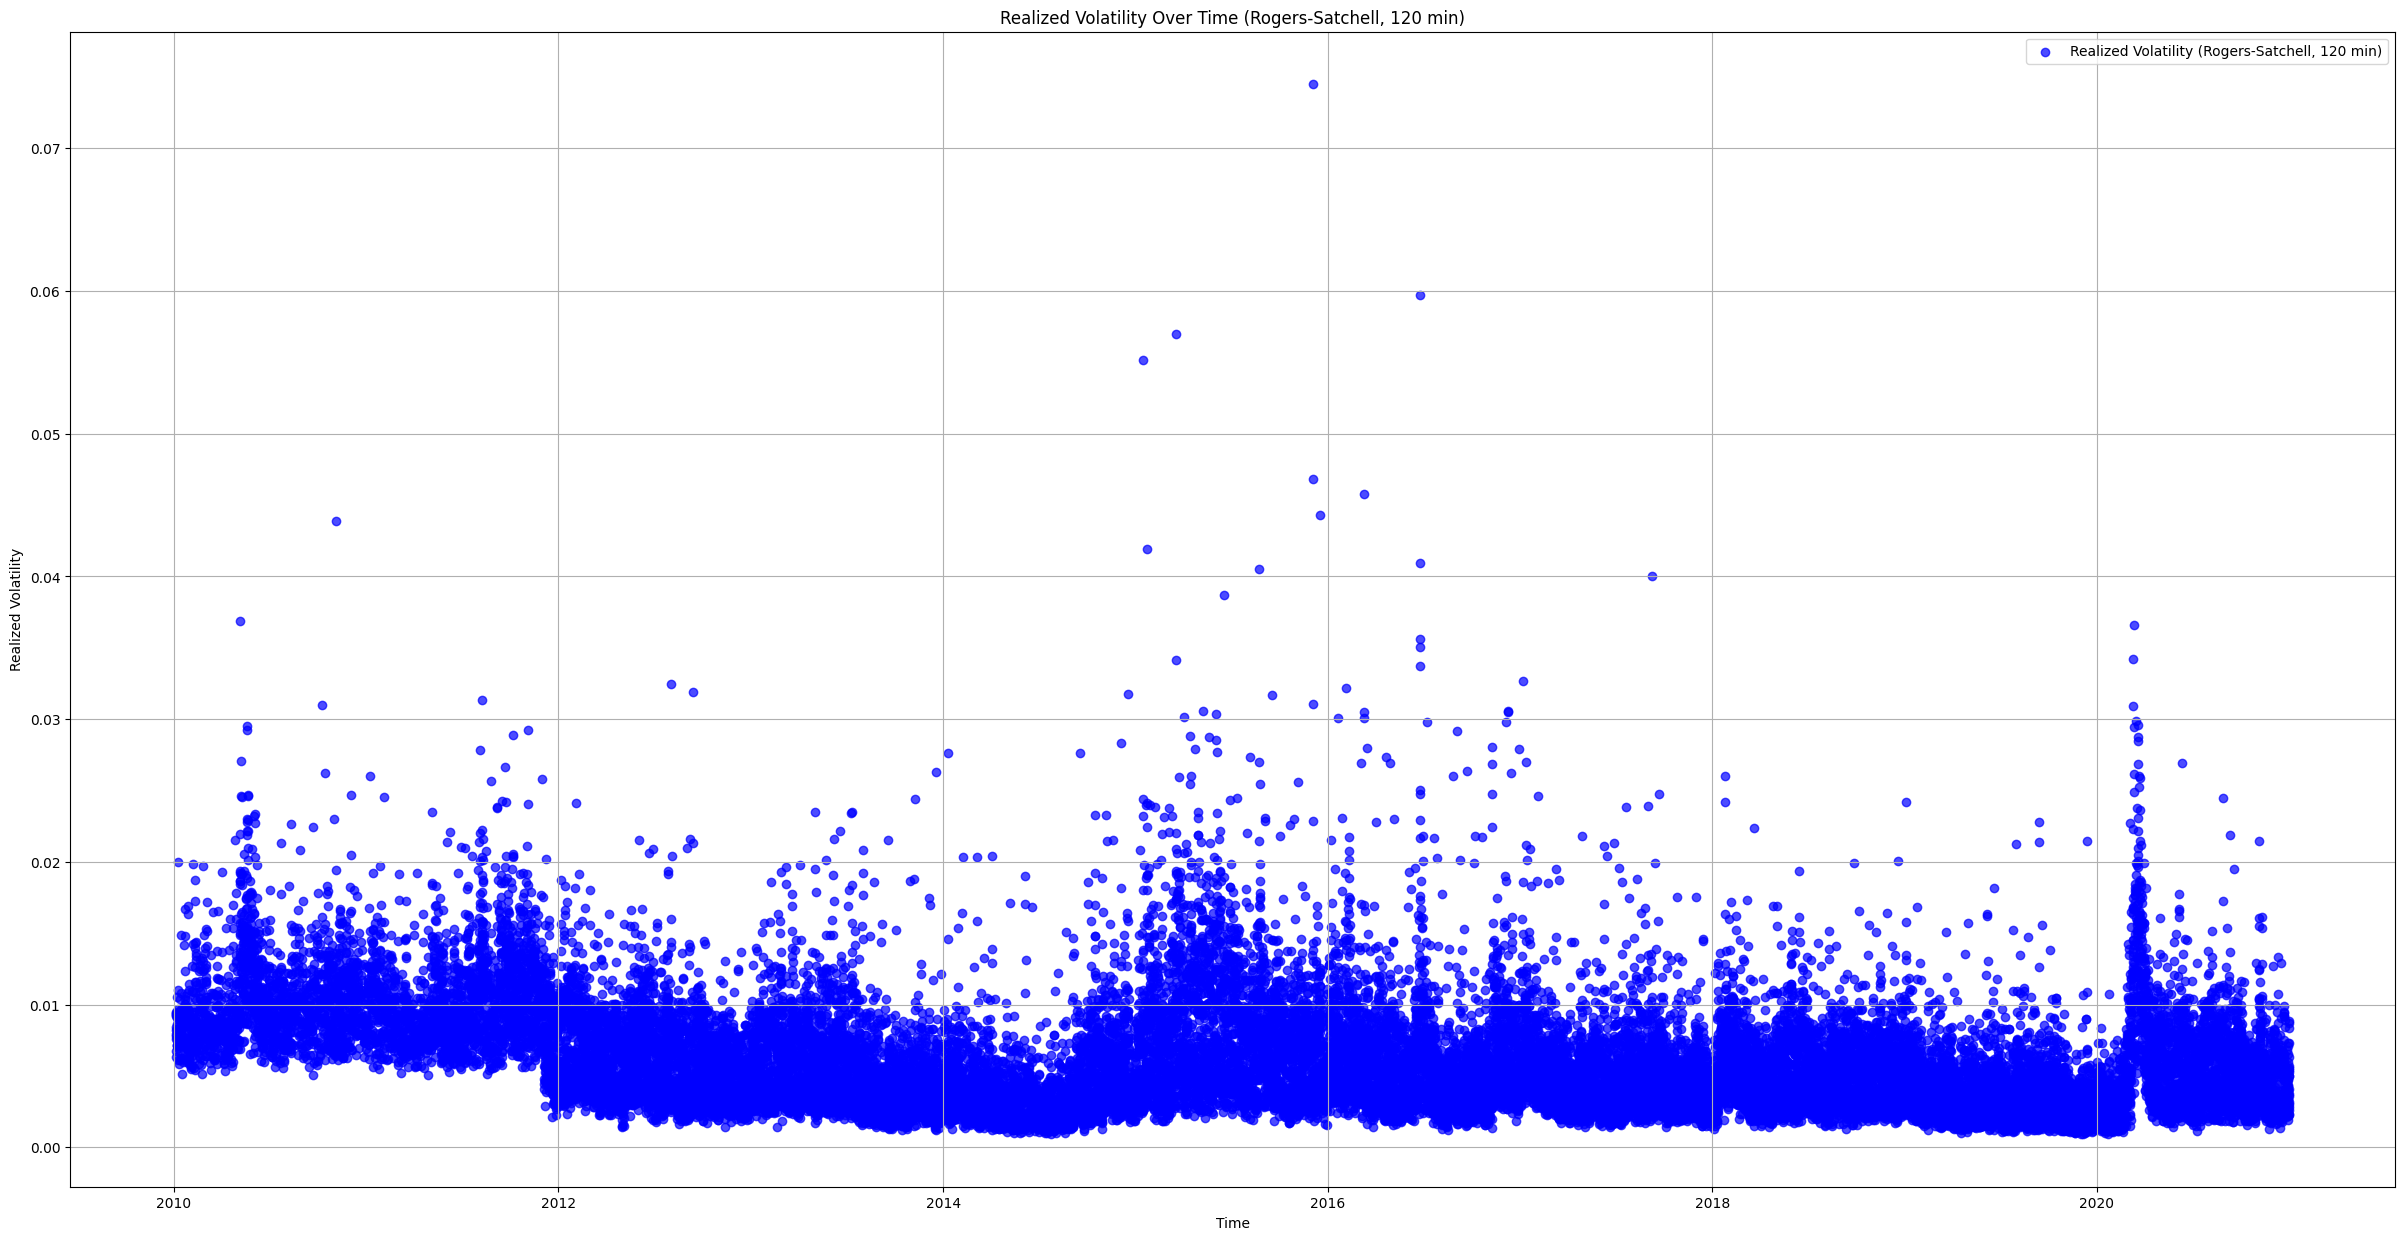

In [65]:
RS_120m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'


In [66]:
RS_120m_rvol.head(20)

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Rogers-Satchell
0,6.0,2010-01-04 02:00:00,2010-01-04 03:59:00,1.4297,1.4339,1.4269,1.4335,0.0,2.0,117.0,0.008235
1,7.0,2010-01-04 04:00:00,2010-01-04 05:59:00,1.4337,1.4399,1.4336,1.4375,0.0,2.0,117.0,0.008401
2,8.0,2010-01-04 06:00:00,2010-01-04 07:59:00,1.4374,1.4417,1.4374,1.4397,0.0,8.0,111.0,0.007799
3,9.0,2010-01-04 08:00:00,2010-01-04 09:59:00,1.4398,1.4450,1.4387,1.4423,0.0,4.0,115.0,0.009467
4,10.0,2010-01-04 10:00:00,2010-01-04 11:59:00,1.4425,1.4456,1.4403,1.4418,0.0,0.0,119.0,0.009395
5,17.0,2010-01-05 00:00:00,2010-01-05 01:59:00,1.4426,1.4476,1.4416,1.4475,0.0,10.0,109.0,0.007953
6,18.0,2010-01-05 02:00:00,2010-01-05 03:59:00,1.4474,1.4483,1.4406,1.4420,0.0,1.0,118.0,0.009296
7,19.0,2010-01-05 04:00:00,2010-01-05 05:59:00,1.4419,1.4438,1.4414,1.4418,0.0,2.0,117.0,0.006733
8,20.0,2010-01-05 06:00:00,2010-01-05 07:59:00,1.4417,1.4455,1.4400,1.4437,0.0,8.0,111.0,0.006349
9,21.0,2010-01-05 08:00:00,2010-01-05 09:59:00,1.4438,1.4446,1.4387,1.4405,0.0,6.0,113.0,0.009183


In [67]:
RS_120m_rvol.describe()

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Rogers-Satchell
count,30125.000000,30125,30125,30125.000000,30125.000000,30125.000000,30125.000000,30125.0,30125.000000,30125.000000,30125.000000
mean,25524.654174,2015-10-31 15:18:30.056763392,2015-10-31 17:17:29.933277696,1.211219,1.212574,1.209878,1.211210,0.0,1.435485,117.562456,0.006155
min,6.000000,2010-01-04 02:00:00,2010-01-04 03:59:00,1.035590,1.037900,1.034060,1.035600,0.0,0.000000,57.000000,0.000917
25%,14209.000000,2013-04-01 16:00:00,2013-04-01 17:59:00,1.119020,1.120170,1.117930,1.119030,0.0,0.000000,117.000000,0.003361
50%,25828.000000,2015-11-25 22:00:00,2015-11-25 23:59:00,1.179660,1.180790,1.178670,1.179660,0.0,0.000000,119.000000,0.005242
75%,37006.000000,2018-06-14 10:00:00,2018-06-14 11:59:00,1.309080,1.310750,1.307470,1.309040,0.0,2.000000,119.000000,0.007936
max,48181.000000,2020-12-31 16:00:00,2020-12-31 16:58:00,1.493700,1.493900,1.486200,1.493200,0.0,12.000000,119.000000,0.074496
std,13302.098799,NaN,NaN,0.107343,0.107571,0.107077,0.107327,0.0,2.658255,2.681047,0.003907


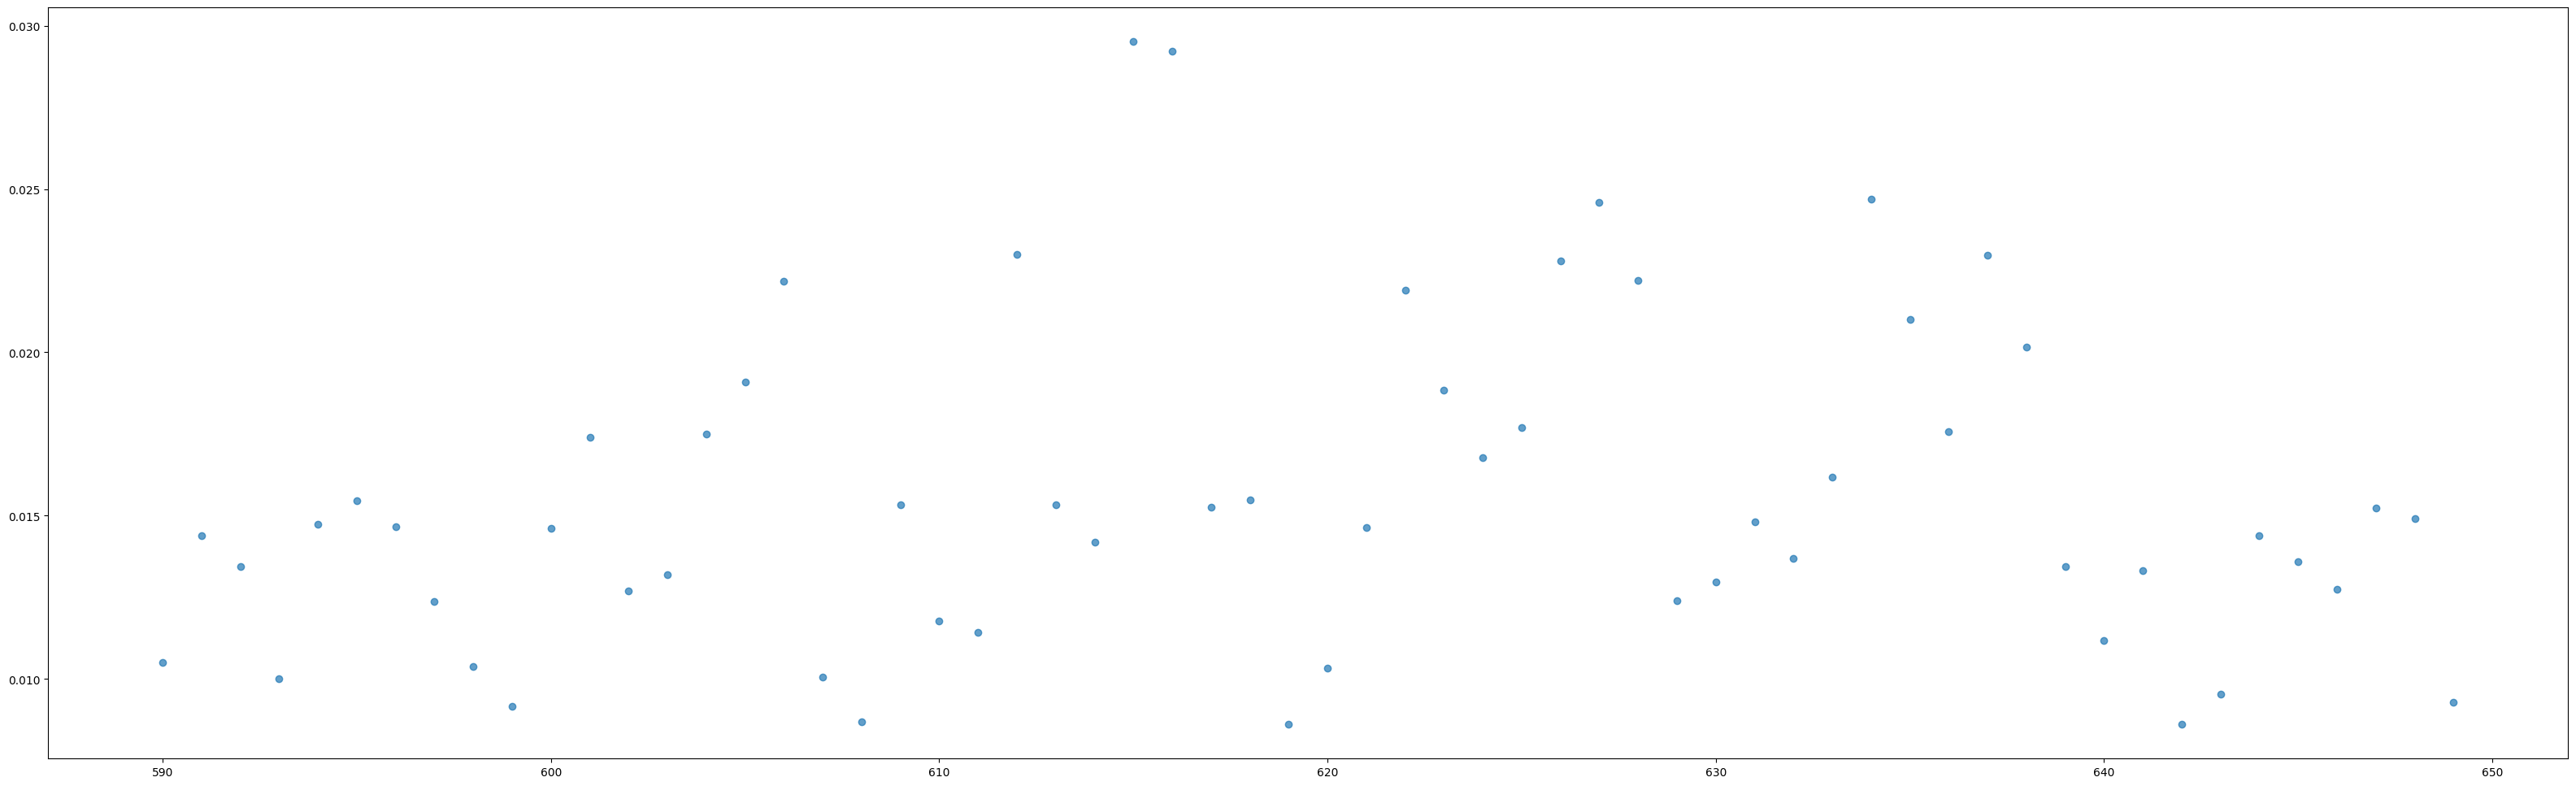

In [68]:
sample = RS_120m_rvol['RVol_120min_Rogers-Satchell'][590:650]

plt.figure(figsize = (40,12))
plt.scatter(sample.index , sample, alpha = 0.7)

                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0        0.0   
2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0        0.0   
2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0        0.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\3694791369.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (5781599, 8)
Threshold value: 0.1 (72.0 points)
Filtered data shape: (3346139, 8)
timeframes removed: 3383
Total timeframes: 8031


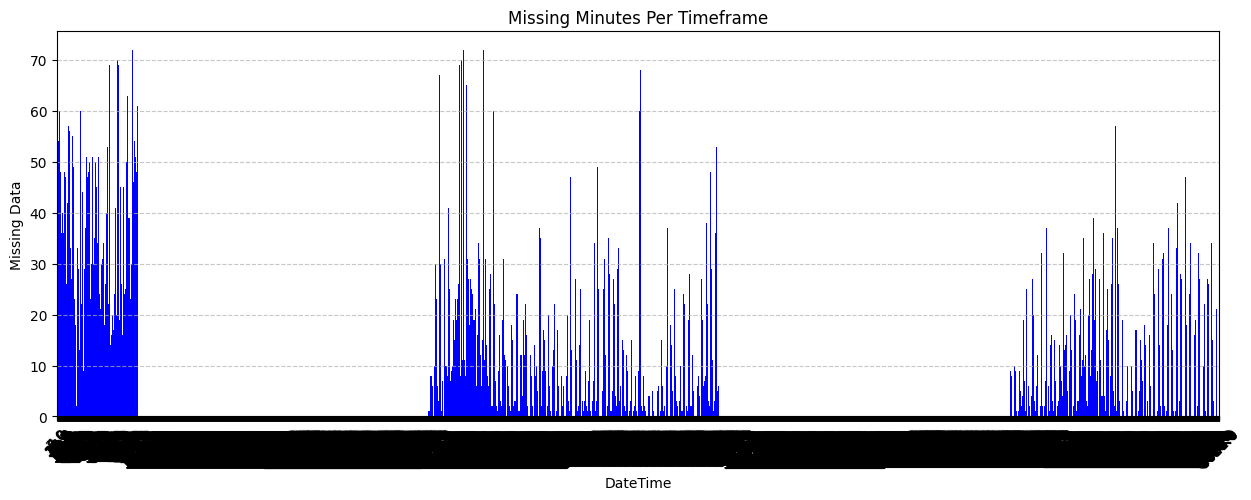

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\3694791369.py:140: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-04 00:00:00  1.42890  1.42890  1.42880  1.42890     0.0        0.0   
2010-01-04 00:01:00  1.42880  1.42890  1.42880  1.42880     0.0        0.0   
2010-01-04 00:02:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-04 00:03:00  1.42900  1.42900  1.42890  1.42900     0.0        0.0   
2010-01-04 00:04:00  1.42890  1.42900  1.42890  1.42900     0.0        0.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

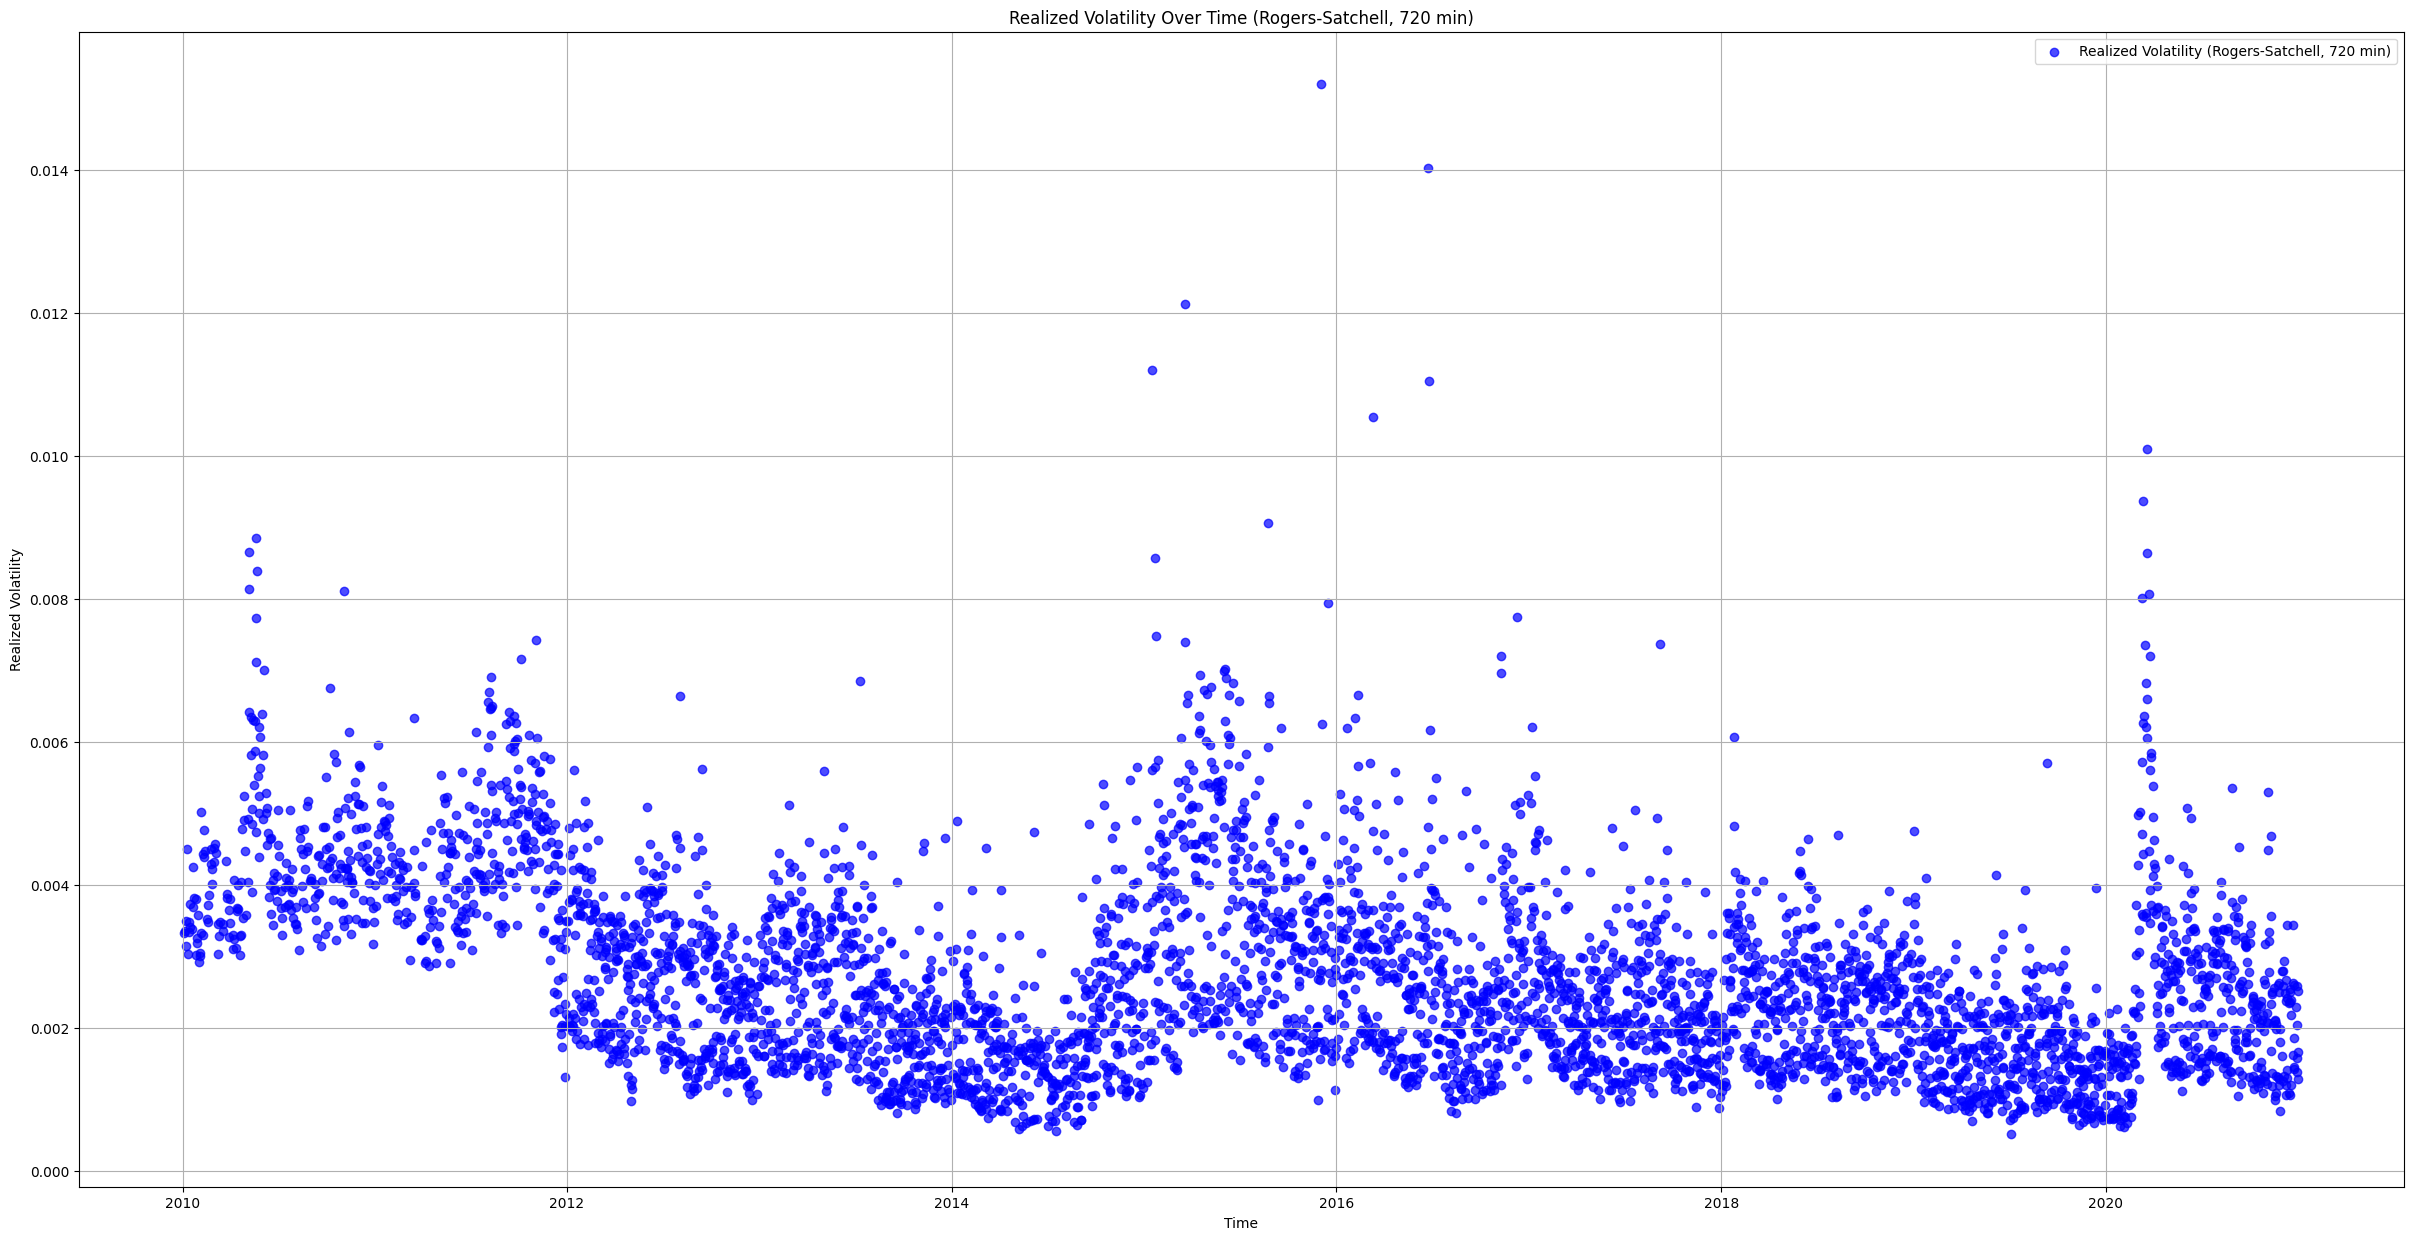

In [69]:

RS_720m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 720, minute_interval = 1, threshold = 0.1, vol_title= 'RVol_720min_Rogers-Satchell')  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [70]:
RS_720m_rvol.describe()

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_720min_Rogers-Satchell
count,4648.000000,4648,4648,4648.000000,4648.000000,4648.000000,4648.000000,4648.0,4648.000000,4648.000000,4648.000000
mean,4301.540017,2015-11-23 18:28:48.743545600,2015-11-24 06:27:43.308950016,1.209564,1.213068,1.206050,1.209522,0.0,12.355207,706.554002,0.002668
min,2.000000,2010-01-04 00:00:00,2010-01-04 11:59:00,1.037390,1.040270,1.034060,1.037380,0.0,0.000000,293.000000,0.000514
25%,2442.750000,2013-05-08 09:00:00,2013-05-08 20:59:00,1.118893,1.121657,1.115915,1.118847,0.0,1.000000,701.000000,0.001662
50%,4358.500000,2015-12-22 06:00:00,2015-12-22 17:59:00,1.178385,1.181090,1.175610,1.178330,0.0,6.000000,713.000000,0.002401
75%,6193.250000,2018-06-26 15:00:00,2018-06-27 02:59:00,1.307468,1.311527,1.304120,1.307390,0.0,18.000000,718.000000,0.003396
max,8031.000000,2020-12-31 12:00:00,2020-12-31 16:58:00,1.486400,1.493900,1.479100,1.487400,0.0,72.000000,719.000000,0.015205
std,2200.725397,NaN,NaN,0.106455,0.106989,0.105799,0.106396,0.0,14.919442,16.105744,0.001336


                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0        0.0   
2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0        0.0   
2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0        0.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\2075161165.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (5781599, 8)
Threshold value: 0.1 (288.0 points)
Filtered data shape: (2156699, 8)
timeframes removed: 1259
Total timeframes: 2008


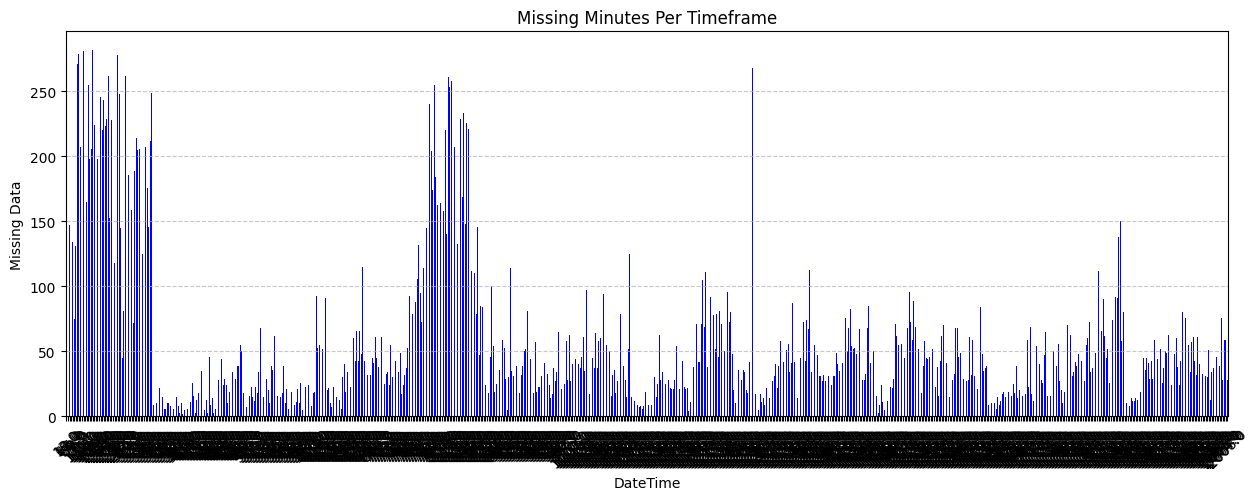

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\2075161165.py:145: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-27 00:00:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-27 00:01:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-27 00:02:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-27 00:03:00  1.40750  1.40760  1.40740  1.40750     0.0        0.0   
2010-01-27 00:04:00      NaN      NaN      NaN      NaN     0.0        1.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

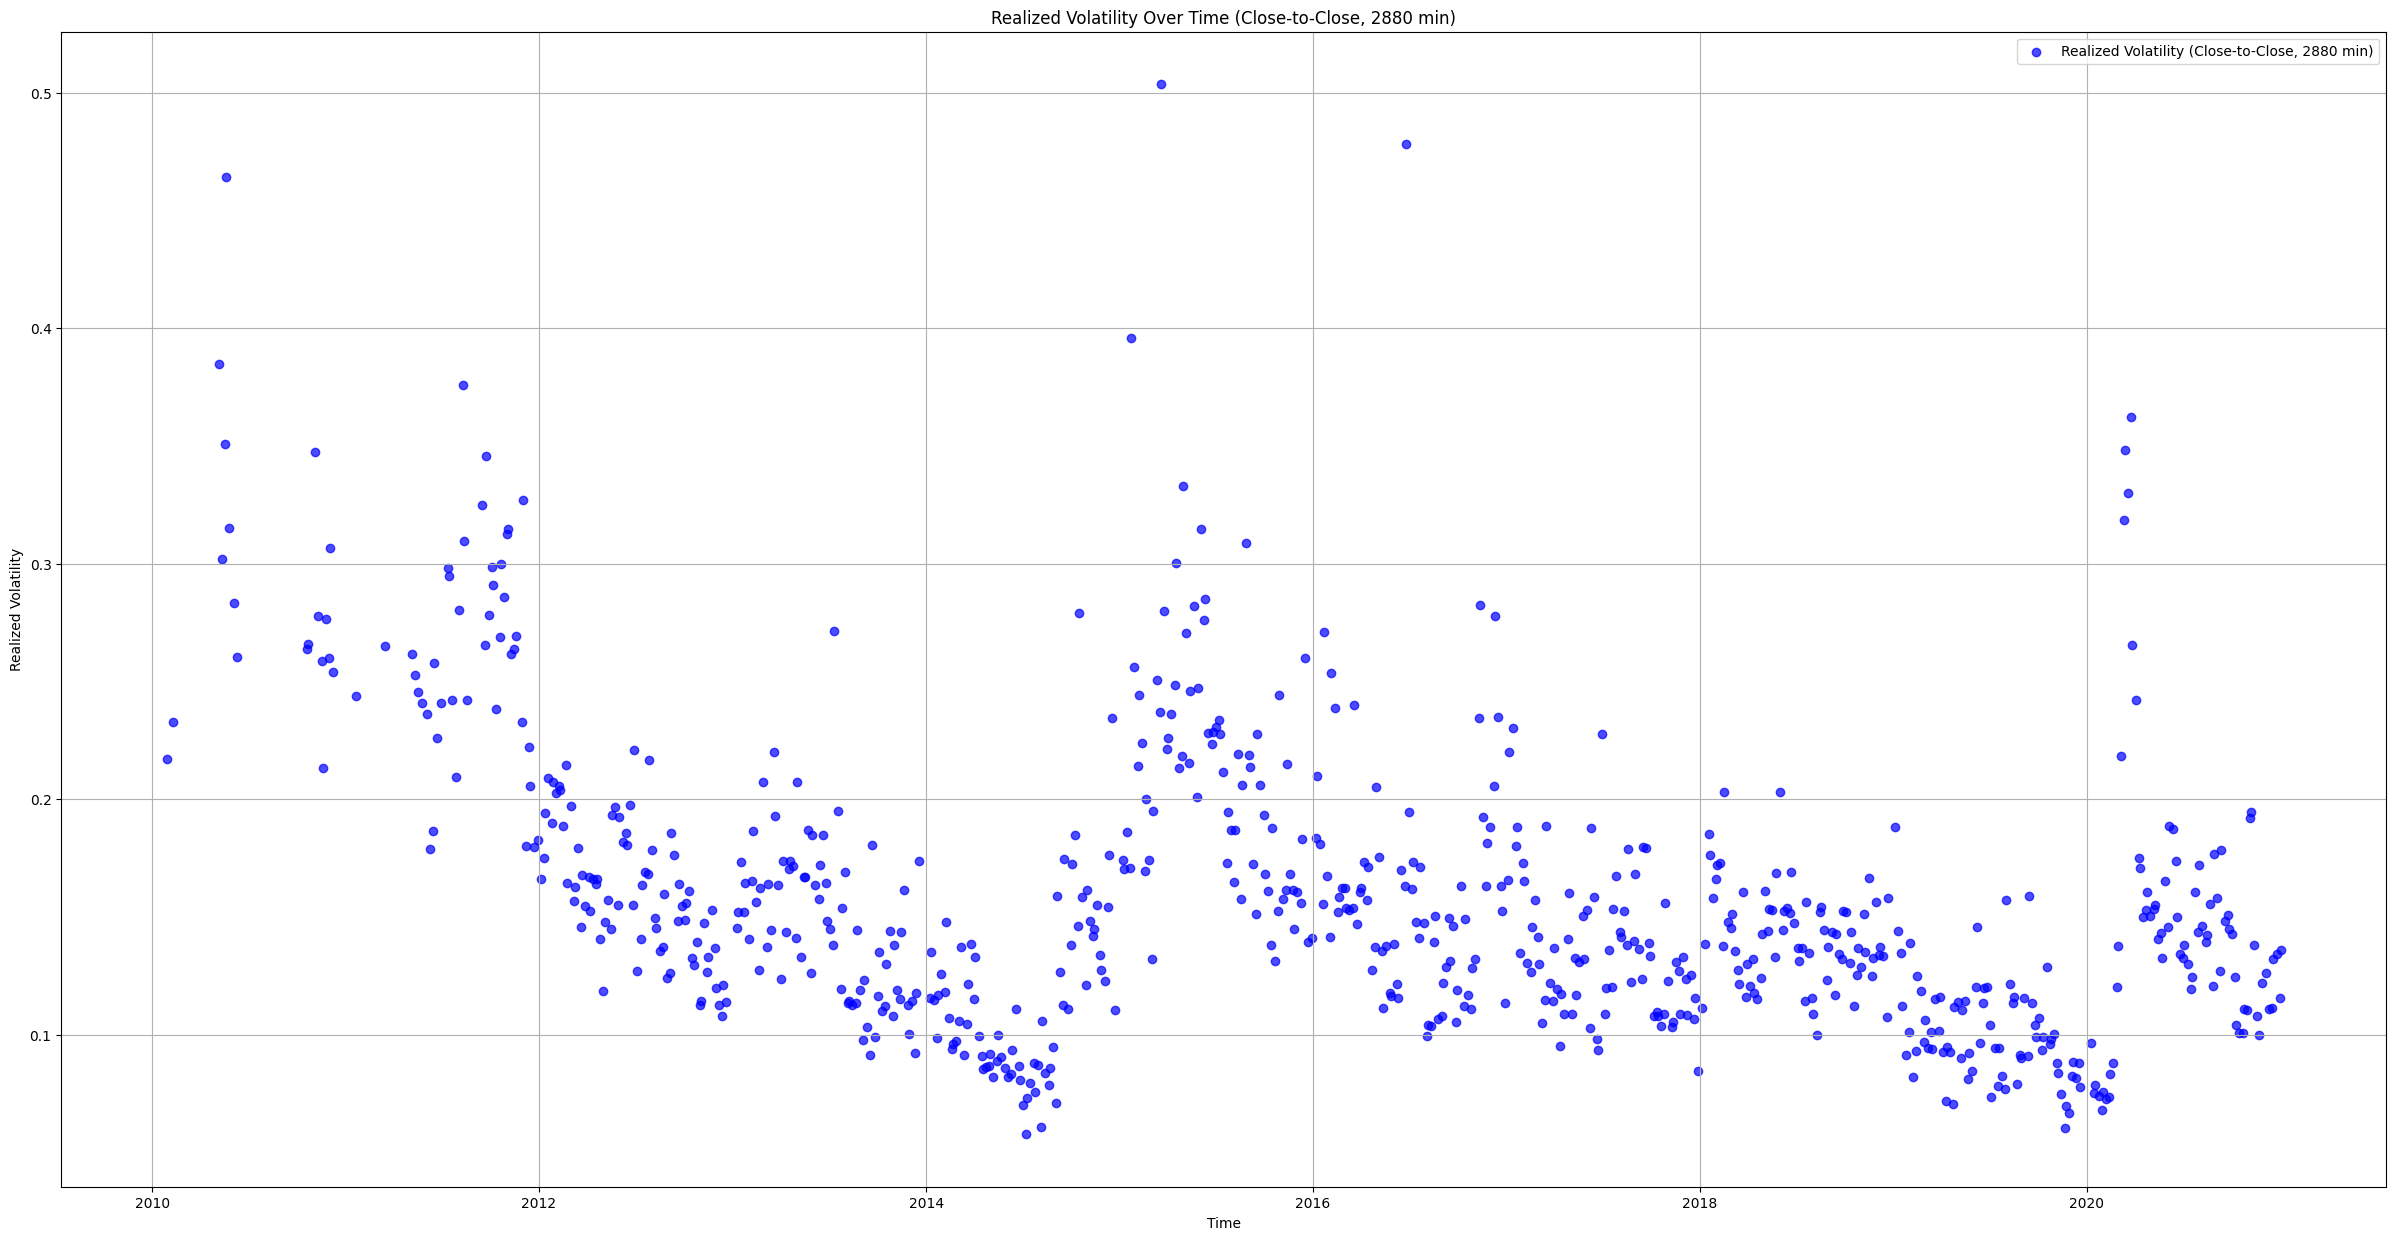

In [136]:
rvol_2880m_cc = calculate_rvol(data, vol_measure='Close-to-Close', timeframe=2880, minute_interval= 1, threshold=0.1, vol_title= 'RVol_2880min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0        0.0   
2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0        0.0   
2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0        0.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\2075161165.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (5781599, 8)
Threshold value: 0.1 (288.0 points)
Filtered data shape: (2156699, 8)
timeframes removed: 1259
Total timeframes: 2008


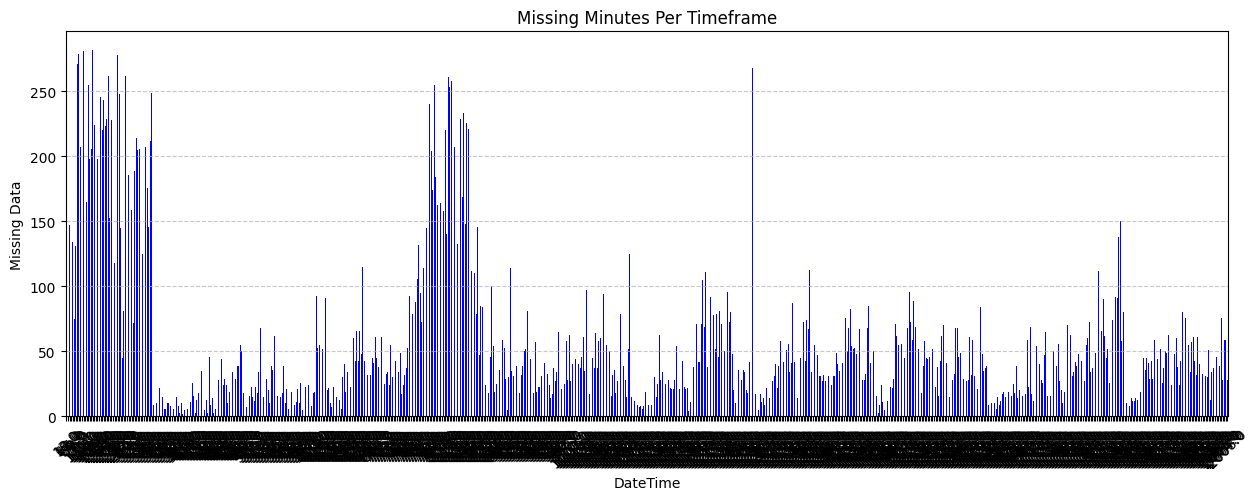

C:\Users\estifo\AppData\Local\Temp\ipykernel_11808\2075161165.py:145: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                        Open     High      Low    Close  Volume  indicator  \
DateTime                                                                     
2010-01-27 00:00:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-27 00:01:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-27 00:02:00      NaN      NaN      NaN      NaN     0.0        1.0   
2010-01-27 00:03:00  1.40750  1.40760  1.40740  1.40750     0.0        0.0   
2010-01-27 00:04:00      NaN      NaN      NaN      NaN     0.0        1.0   
...                      ...      ...      ...      ...     ...        ...   
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0        0.0   
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0        0.0   
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0        0.0   
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0        0.0   
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0 

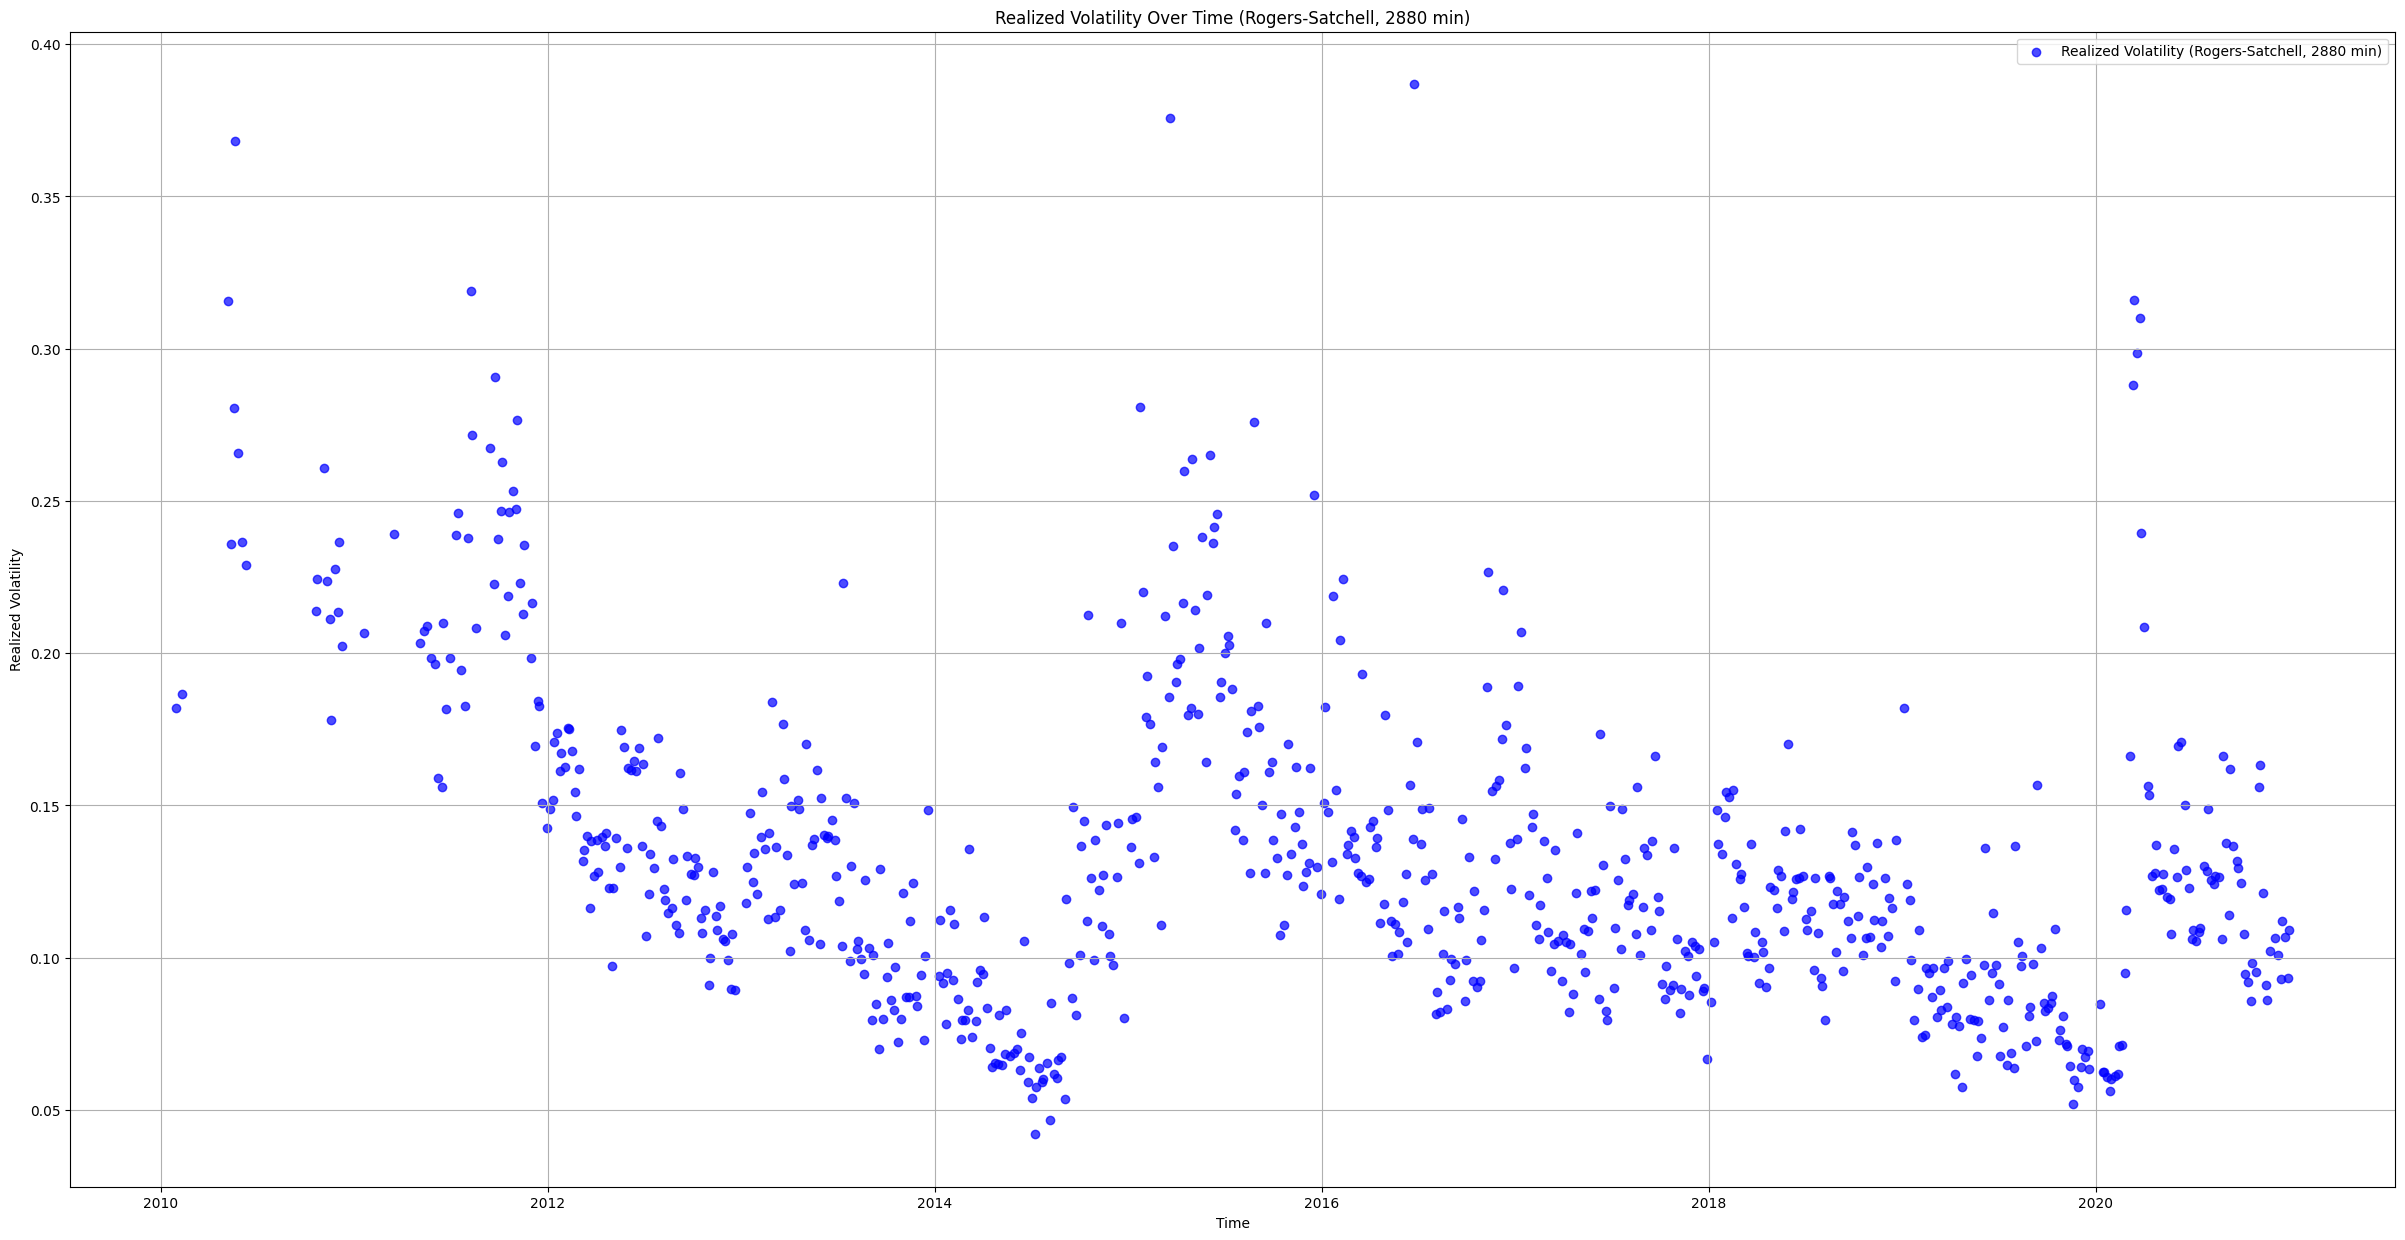

In [123]:
rvol_2880m_rs = calculate_rvol(data, vol_measure='Rogers-Satchell', timeframe=2880, minute_interval= 1, threshold=0.1, vol_title= 'RVol_2880min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [72]:
rvol_2880m_rs['RVol_2880min_Rogers-Satchell'].describe()

count    749.000000
mean       0.001310
std        0.000506
min        0.000408
25%        0.000969
50%        0.001221
75%        0.001519
max        0.003848
Name: RVol_2880min_Rogers-Satchell, dtype: float64

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def plot_rvol_histogram(rvol_data, title='Realized Volatility Histogram', bins=100):
    """
    Plots a histogram of realized volatility values.
    
    Parameters:
    - rvol_data (pd.Series or pd.DataFrame): The realized volatility data.
    - title (str): The title of the plot.
    - bins (int): Number of histogram bins.
    """
    
    # If DataFrame, extract the first column
    if isinstance(rvol_data, pd.DataFrame):
        rvol_data = rvol_data.iloc[:, 0]
    
    # Drop NaN and inf/-inf
    rvol_data = rvol_data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Check if we have valid data after cleaning
    if len(rvol_data) == 0:
        print("No valid data points to plot after removing NaN and infinite values.")
        return
    
    # Additional check for non-positive values before taking log
    if (rvol_data <= 0).any():
        print(f"Warning: Found {(rvol_data <= 0).sum()} non-positive values that cannot be log-transformed.")
        rvol_data = rvol_data[rvol_data > 0]  # Filter out non-positive values
        
        if len(rvol_data) == 0:
            print("No positive values left to plot after filtering.")
            return
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the histogram using log values
    log_data = np.log(rvol_data)
    
    # Check again if we have valid log data
    if np.isnan(log_data).all():
        print("All log-transformed values are NaN. Cannot create histogram.")
        return
    
    ax.hist(log_data, bins=bins, edgecolor='k', alpha=0.7)
    
    # Mean line (in log space)
    mean_val = log_data.mean()
    ax.axvline(x=mean_val, color='green', linestyle='--', 
               label=f'Mean: {np.exp(mean_val):.4f}')
    
    # Custom formatter to show original rVol values
    from matplotlib.ticker import FuncFormatter
    
    def exp_formatter(x, pos):
        # Convert from log value back to original value for display
        return f'{np.exp(x):.3f}'
    
    ax.xaxis.set_major_formatter(FuncFormatter(exp_formatter))
    
    # Labels and title
    ax.set_title(title)
    ax.set_xlabel('Realized Volatility')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

def analyze_volatility_prediction(rVol, rVol_pred, time):
    # Calculate log ratio
    log_ratio = np.log(rVol / rVol_pred)
    
    # Compute statistics
    stats = {
        'mean': np.mean(log_ratio),
        'std': np.std(log_ratio),
        'skew': pd.Series(log_ratio).skew(),
        'kurtosis': pd.Series(log_ratio).kurt(),
        'correlation': np.corrcoef(rVol, rVol_pred)[0,1]
    }
    
    
    plt.figure(figsize=(10,5))
    plt.scatter(time, log_ratio)
    plt.title('ln(rVol/rVol_pred) Over Time')
    plt.xlabel('Time')
    plt.ylabel('Percentage Error')
    plt.axhline(y=0, color='r', linestyle='--')  # This adds a horizontal red dashed line at y=0
    plt.show()

        # Print out interpretation
    print("Prediction Quality Analysis:")
    print(f"Mean (Bias): {stats['mean']:.4f}")
    print(f"  > Close to 0 = Unbiased predictions")
    print(f"Standard Deviation (Consistency): {stats['std']:.4f}")
    print(f"  > Smaller = More consistent predictions")
    print(f"Skewness (Error Asymmetry): {stats['skew']:.4f}")
    print(f"  > 0 = Symmetric errors")
    print(f"  > Positive = More over-predictions")
    print(f"  > Negative = More under-predictions")
    print(f"Kurtosis (Tail Behavior): {stats['kurtosis']:.4f}")
    print(f"  > 0 = Normal tail behavior")
    print(f"  > Positive = More extreme errors")
    print(f"Correlation: {stats['correlation']:.4f}")
    print(f"  > 1 = Perfect linear relationship")
    
    plt.figure(figsize=(10,5))
    plt.hist(log_ratio, bins=100, edgecolor='k', alpha=0.7)
    plt.title('Distribution of ln(rVol/rVol_pred)')
    plt.xlabel('Log Ratio')
    plt.ylabel('Frequency')
    plt.show()
    
    
    #plot_log_ratio_histogram_simple(log_ratio, title='Distribution of ln(rVol/rVol_pred)', percentile_cutoff = 10)


    return

def plot_rvol_r2(rvol_series, title='Predicted vs Actual Realized Volatility'):
    """
    Uses the previous rVol value as the prediction and plots R² between predicted and actual rVol.
    
    Parameters:
    - rvol_series (pd.Series): A time series of realized volatility values.
    - title (str): Title of the plot.
    """
    
    # Clean the series: remove inf and NaN
    rvol_series = rvol_series.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Use lag-1 as prediction
    rvol_pred = rvol_series.shift(1).dropna()
    rvol_actual = rvol_series.iloc[1:]
    
    # Align indices
    rvol_pred = rvol_pred.loc[rvol_actual.index]
    
    # Final clean: ensure both have no inf or NaN
    mask = (~rvol_actual.isna()) & (~rvol_pred.isna()) & \
           (~np.isinf(rvol_actual)) & (~np.isinf(rvol_pred))
    rvol_actual = rvol_actual[mask]
    rvol_pred = rvol_pred[mask]
    
    # Check if there is enough data
    if len(rvol_actual) < 2:
        print("Not enough valid data to calculate R².")
        return None
    
    # R² Score
    r2 = r2_score(rvol_actual, rvol_pred)
    # ln R² Score
    ln_R2 = r2_score(np.log(rvol_actual), np.log(rvol_pred))
    '''
    # Plot 1: Predicted vs Actual (swapped axes)
    plt.figure(figsize=(8, 6))
    plt.scatter(rvol_pred, rvol_actual, alpha=0.5)  # Swapped axes here
    plt.xlabel('Predicted rVol')                    # Swapped label
    plt.ylabel('Actual rVol')                       # Swapped label
    plt.title(f'{title}\nCorrelation ($R^2$ = {r2:.4f})')
    plt.grid(True)
    plt.show()'''
    
    # Plot 2: Log-Log plot with original rVol labels (swapped axes)
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calculate log values for plotting
    log_actual = np.log(rvol_actual)
    log_pred = np.log(rvol_pred)
    
    # Scatter plot of log values (swapped axes)
    ax.scatter(log_pred, log_actual, alpha=0.5)  # Swapped axes here
    
    # Set up custom tick locators and formatters to show original values
    from matplotlib.ticker import ScalarFormatter, LogLocator
    
    # Create formatters that will convert log values back to original scale for display
    class ExpFormatter(ScalarFormatter):
        def __call__(self, x, pos=None):
            # Convert log value to original value for display
            return f"{np.exp(x):.3f}"
    
    # Apply the formatters to both axes
    ax.xaxis.set_major_formatter(ExpFormatter())
    ax.yaxis.set_major_formatter(ExpFormatter())
    
    # Set labels and title (swapped labels)
    ax.set_xlabel('Predicted rVol')                   # Swapped label
    ax.set_ylabel('Actual rVol')                      # Swapped label
    ax.set_title(f'{title} (Log-Log Scale)\n$R^2$ = {ln_R2:.4f}')
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    stats = analyze_volatility_prediction(rvol_actual, rvol_pred, time=rvol_actual.index)
    
    return stats

In [74]:
def plot_log_ratio_histogram_simple(log_ratio, title='Distribution of ln(rVol/rVol_pred)', percentile_cutoff=2.5):
    """
    Plots a histogram of log ratios with extreme values cut off.
    
    Parameters:
    - log_ratio: Series or array of log ratio values
    - title: Plot title
    - percentile_cutoff: Percentile to cut off at both ends (default 2.5%)
    """
    # Find cutoff points
    lower_bound = np.percentile(log_ratio, percentile_cutoff)
    upper_bound = np.percentile(log_ratio, 100 - percentile_cutoff)
    
    # Filter data to exclude extreme values
    filtered_data = log_ratio[(log_ratio >= lower_bound) & (log_ratio <= upper_bound)]
    
    # Calculate statistics
    mean_val = np.mean(filtered_data)
    median_val = np.median(filtered_data)
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(filtered_data, bins=100, edgecolor='k', alpha=0.7)
    
    # Add mean and median lines
    plt.axvline(x=mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.4f}')
    plt.axvline(x=median_val, color='green', linestyle='--', label=f'Median: {median_val:.4f}')
    
    # Add labels and title
    plt.title(f'{title} (Excluding {percentile_cutoff}% highest and lowest)')
    plt.xlabel('Log Ratio')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    
    # Print how many values were cut off
    print(f"Original data size: {len(log_ratio)}")
    print(f"Filtered data size: {len(filtered_data)}")
    print(f"Mean of filtered data: {mean_val:.4f}")
    print(f"Number of outliers removed: {len(log_ratio) - len(filtered_data)} ({100*(len(log_ratio) - len(filtered_data))/len(log_ratio):.2f}%)")
    print(f"Data range shown: [{lower_bound:.4f}, {upper_bound:.4f}]")
    
    plt.show()

In [75]:
def average_dist_pred_rvol(data):
    # compute group_id[i] - group_id[i-1] for all i, drop the NaN at the start
    diffs = data['group_id'].diff().iloc[1:]
    return diffs.mean()

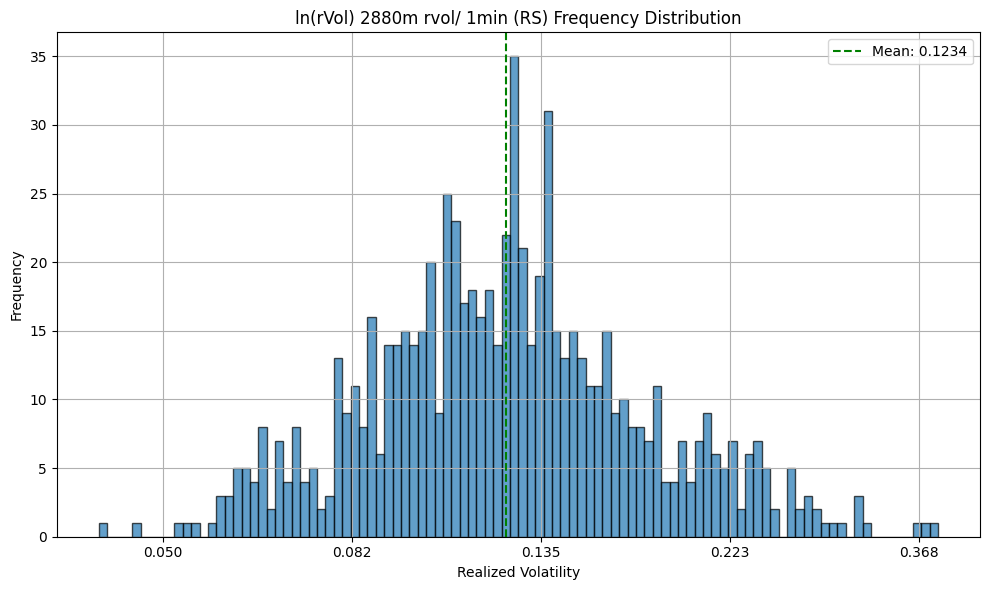

In [ ]:
plot_rvol_histogram(rvol_2880m_rs['RVol_2880min_Rogers-Satchell'], title='ln(rVol) 2880m rvol/ 1min (RS) Frequency Distribution', bins=100)

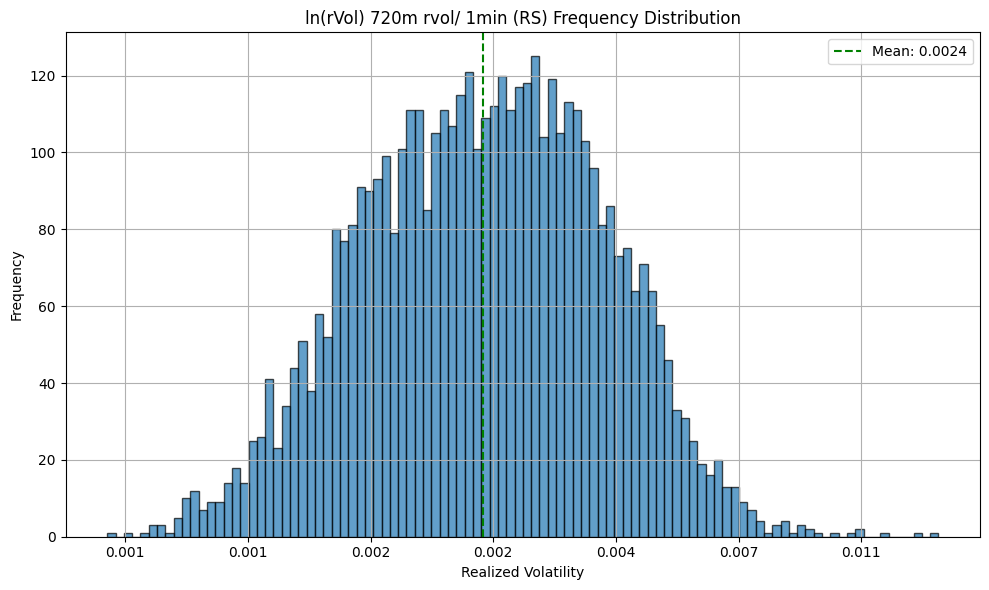

In [77]:
plot_rvol_histogram(RS_720m_rvol['RVol_720min_Rogers-Satchell'], title='ln(rVol) 720m rvol/ 1min (RS) Frequency Distribution', bins=100)

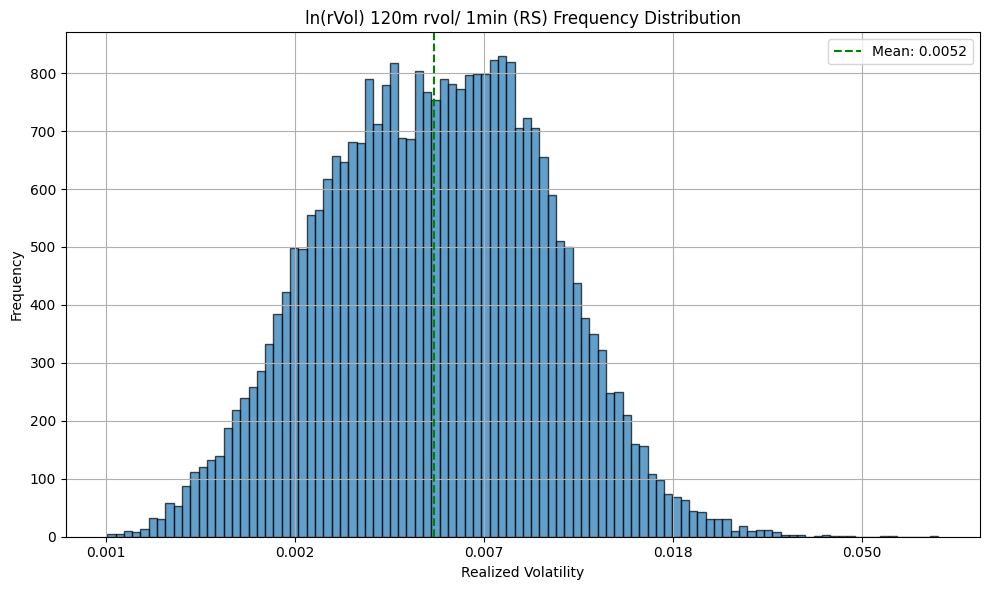

In [78]:
plot_rvol_histogram(RS_120m_rvol['RVol_120min_Rogers-Satchell'], title='ln(rVol) 120m rvol/ 1min (RS) Frequency Distribution', bins=100)

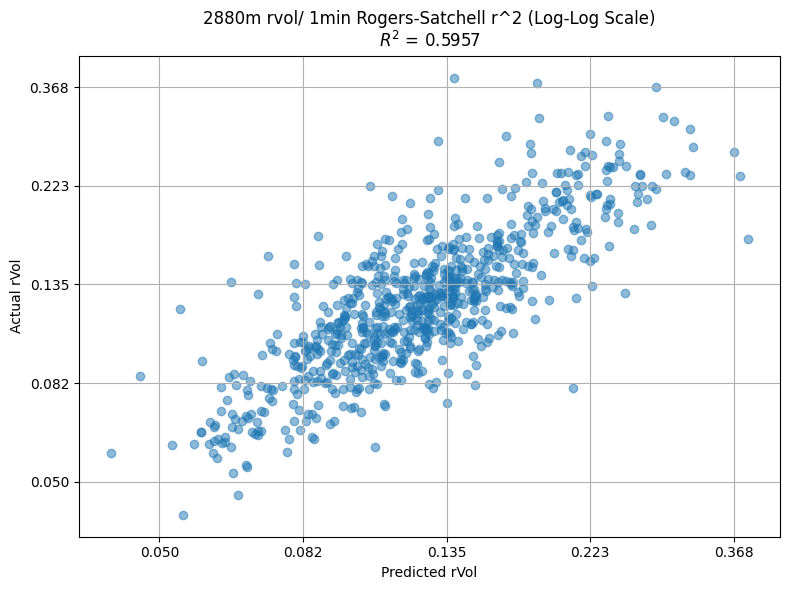

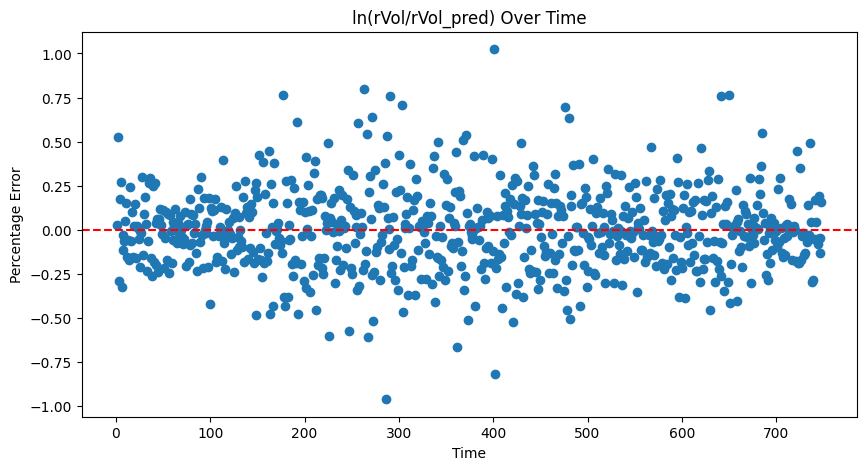

Prediction Quality Analysis:
Mean (Bias): -0.0007
  > Close to 0 = Unbiased predictions
Standard Deviation (Consistency): 0.2299
  > Smaller = More consistent predictions
Skewness (Error Asymmetry): 0.3140
  > 0 = Symmetric errors
  > Positive = More over-predictions
  > Negative = More under-predictions
Kurtosis (Tail Behavior): 1.5251
  > 0 = Normal tail behavior
  > Positive = More extreme errors
Correlation: 0.7723
  > 1 = Perfect linear relationship


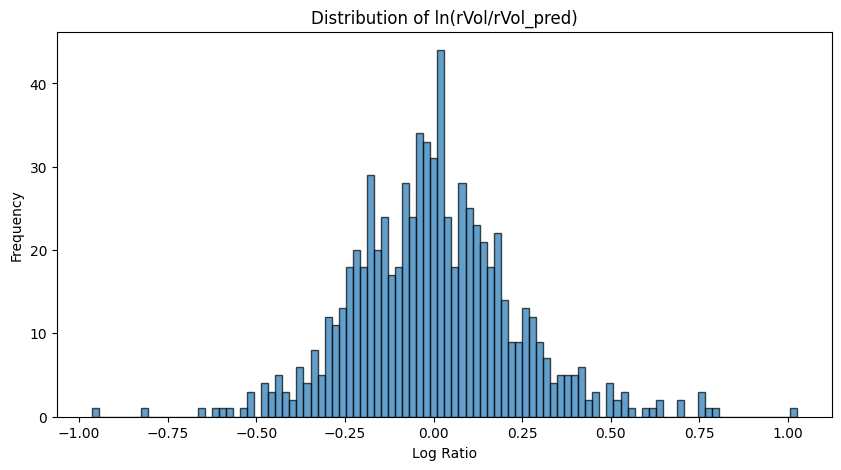

In [125]:
plot_rvol_r2(rvol_2880m_rs['RVol_2880min_Rogers-Satchell'], title='2880m rvol/ 1min Rogers-Satchell r^2')


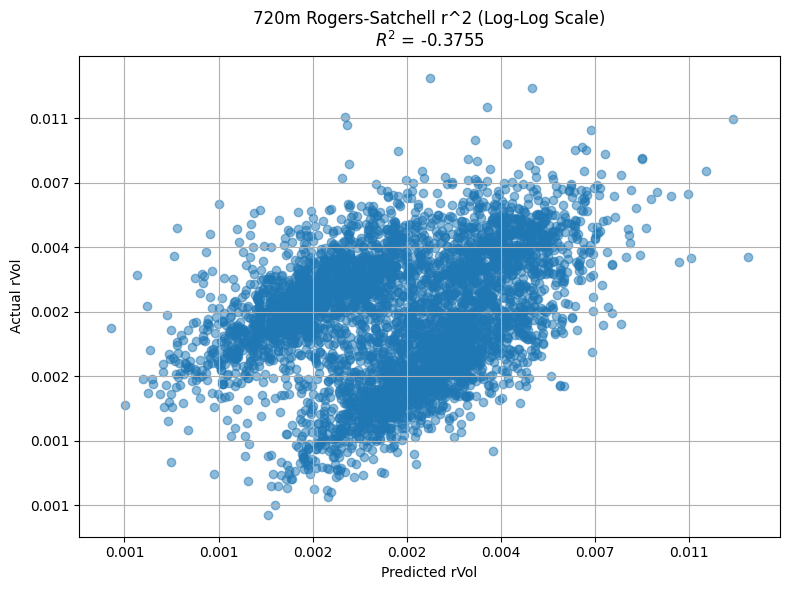

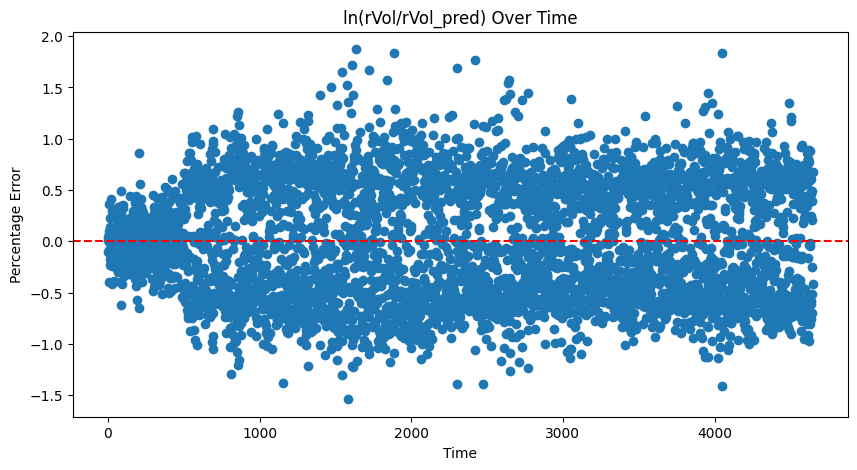

Prediction Quality Analysis:
Mean (Bias): -0.0001
  > Close to 0 = Unbiased predictions
Standard Deviation (Consistency): 0.5720
  > Smaller = More consistent predictions
Skewness (Error Asymmetry): 0.1569
  > 0 = Symmetric errors
  > Positive = More over-predictions
  > Negative = More under-predictions
Kurtosis (Tail Behavior): -0.9634
  > 0 = Normal tail behavior
  > Positive = More extreme errors
Correlation: 0.3910
  > 1 = Perfect linear relationship


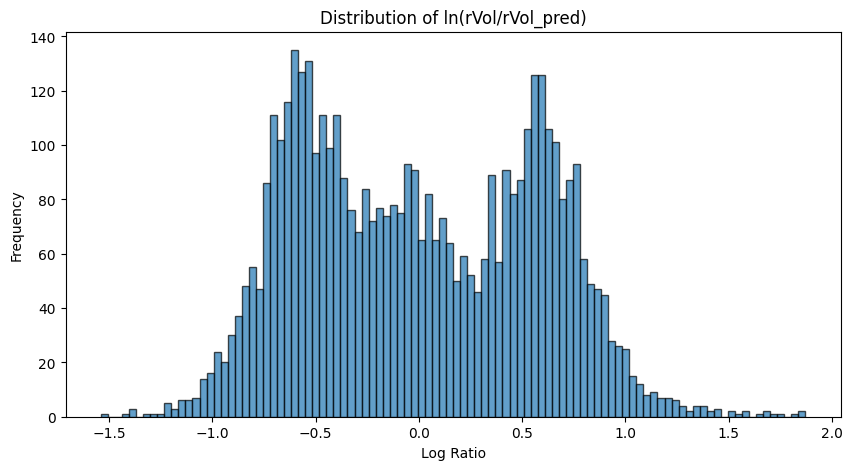

In [80]:
plot_rvol_r2(RS_720m_rvol['RVol_720min_Rogers-Satchell'], title='720m Rogers-Satchell r^2')


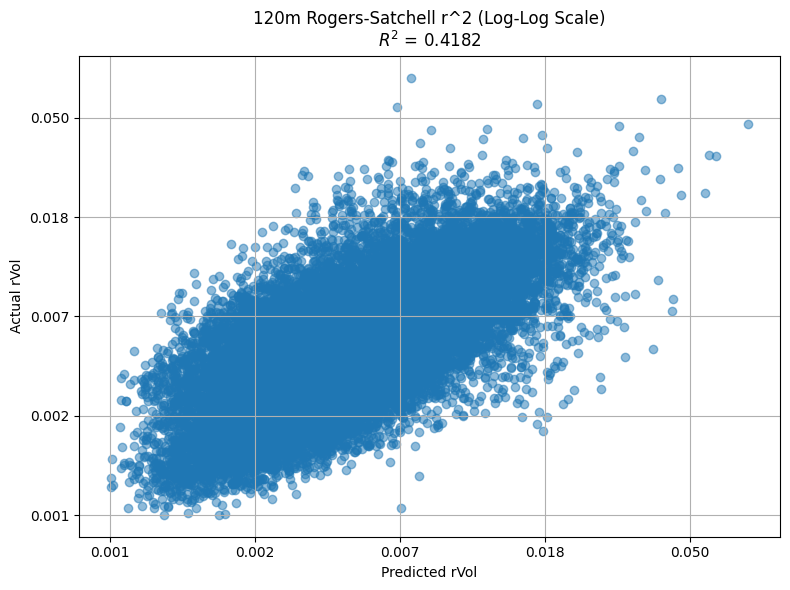

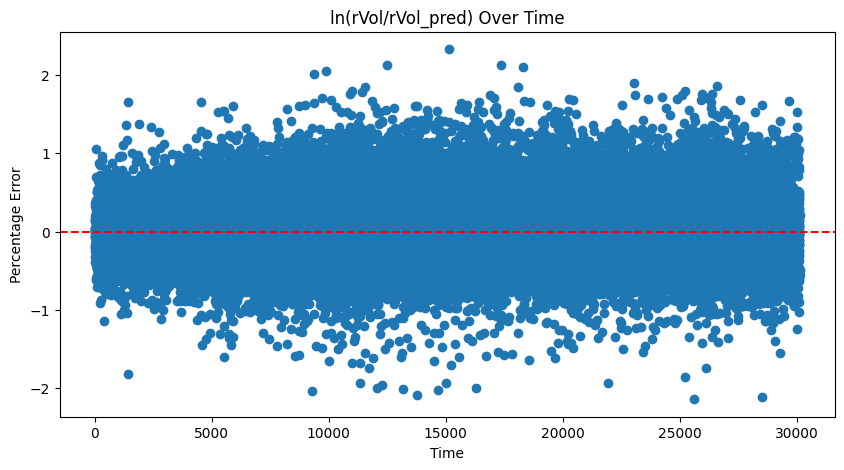

Prediction Quality Analysis:
Mean (Bias): -0.0000
  > Close to 0 = Unbiased predictions
Standard Deviation (Consistency): 0.4508
  > Smaller = More consistent predictions
Skewness (Error Asymmetry): 0.4375
  > 0 = Symmetric errors
  > Positive = More over-predictions
  > Negative = More under-predictions
Kurtosis (Tail Behavior): 0.8776
  > 0 = Normal tail behavior
  > Positive = More extreme errors
Correlation: 0.6433
  > 1 = Perfect linear relationship


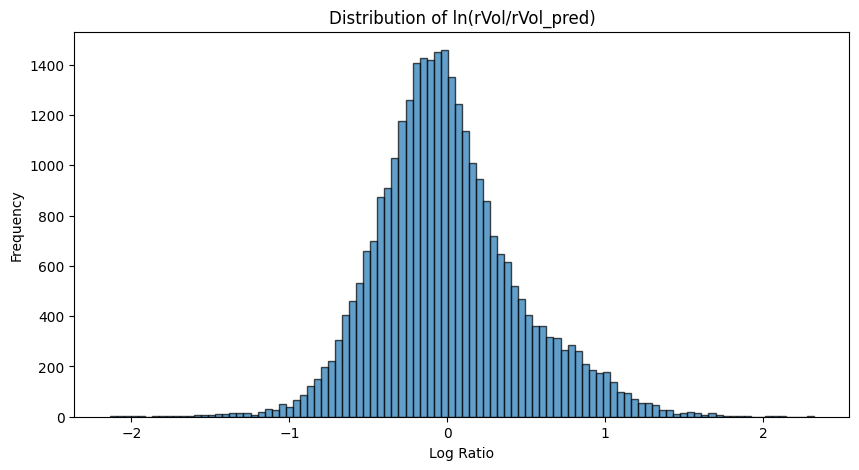

In [81]:
plot_rvol_r2(RS_120m_rvol['RVol_120min_Rogers-Satchell'], title='120m Rogers-Satchell r^2')

In [82]:
RS_120m_rvol#.head(20)

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Rogers-Satchell
0,6.0,2010-01-04 02:00:00,2010-01-04 03:59:00,1.42970,1.43390,1.42690,1.43350,0.0,2.0,117.0,0.008235
1,7.0,2010-01-04 04:00:00,2010-01-04 05:59:00,1.43370,1.43990,1.43360,1.43750,0.0,2.0,117.0,0.008401
2,8.0,2010-01-04 06:00:00,2010-01-04 07:59:00,1.43740,1.44170,1.43740,1.43970,0.0,8.0,111.0,0.007799
3,9.0,2010-01-04 08:00:00,2010-01-04 09:59:00,1.43980,1.44500,1.43870,1.44230,0.0,4.0,115.0,0.009467
4,10.0,2010-01-04 10:00:00,2010-01-04 11:59:00,1.44250,1.44560,1.44030,1.44180,0.0,0.0,119.0,0.009395
...,...,...,...,...,...,...,...,...,...,...,...
30120,48177.0,2020-12-31 08:00:00,2020-12-31 09:59:00,1.22716,1.22870,1.22640,1.22692,0.0,0.0,119.0,0.005399
30121,48178.0,2020-12-31 10:00:00,2020-12-31 11:59:00,1.22692,1.22704,1.22208,1.22299,0.0,0.0,119.0,0.008680
30122,48179.0,2020-12-31 12:00:00,2020-12-31 13:59:00,1.22298,1.22346,1.22149,1.22166,0.0,0.0,119.0,0.005010
30123,48180.0,2020-12-31 14:00:00,2020-12-31 15:59:00,1.22166,1.22228,1.22091,1.22158,0.0,4.0,115.0,0.003061


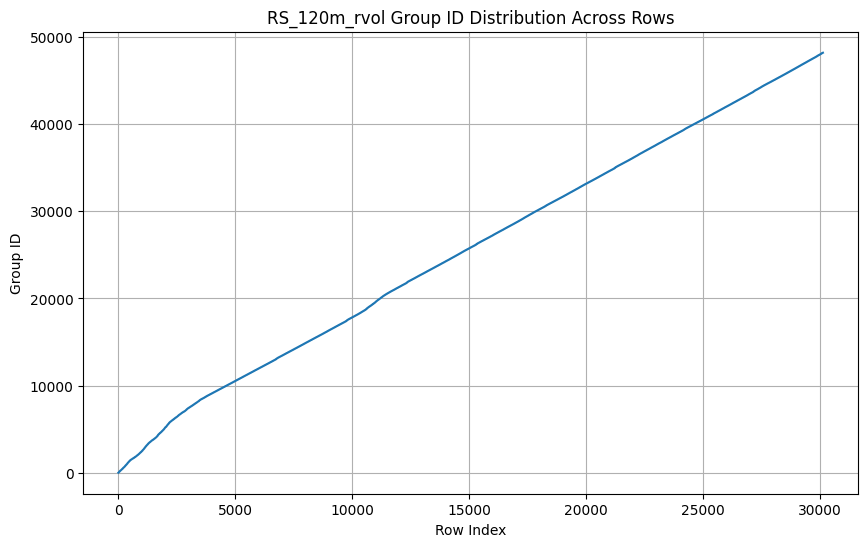

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(RS_120m_rvol.index, RS_120m_rvol['group_id'])
plt.xlabel('Row Index')
plt.ylabel('Group ID')
plt.title('RS_120m_rvol Group ID Distribution Across Rows')
plt.grid(True)

plt.show()

In [84]:
RS_120m_rvol['group_id'].describe()

count    30125.000000
mean     25524.654174
std      13302.098799
min          6.000000
25%      14209.000000
50%      25828.000000
75%      37006.000000
max      48181.000000
Name: group_id, dtype: float64

In [85]:
average_dist_pred_rvol(RS_120m_rvol)

np.float64(1.5992232107289868)

In [86]:
RS_720m_rvol.dropna(inplace=True)
RS_720m_rvol#.head(20)

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_720min_Rogers-Satchell
0,2.0,2010-01-04 00:00:00,2010-01-04 11:59:00,1.42890,1.44560,1.42690,1.44180,0.0,39.0,680.0,0.003329
1,4.0,2010-01-05 00:00:00,2010-01-05 11:59:00,1.44260,1.44830,1.43860,1.44010,0.0,27.0,692.0,0.003356
2,6.0,2010-01-06 00:00:00,2010-01-06 11:59:00,1.43560,1.44160,1.42830,1.44030,0.0,46.0,673.0,0.003501
3,8.0,2010-01-07 00:00:00,2010-01-07 11:59:00,1.43980,1.44040,1.42990,1.43130,0.0,28.0,691.0,0.003151
4,10.0,2010-01-08 00:00:00,2010-01-08 11:59:00,1.43140,1.44150,1.42630,1.43560,0.0,51.0,668.0,0.004512
...,...,...,...,...,...,...,...,...,...,...,...
4643,8027.0,2020-12-29 12:00:00,2020-12-29 23:59:00,1.22517,1.22948,1.22359,1.22848,0.0,34.0,685.0,0.001587
4644,8028.0,2020-12-30 00:00:00,2020-12-30 11:59:00,1.22849,1.23101,1.22527,1.22790,0.0,0.0,719.0,0.002593
4645,8029.0,2020-12-30 12:00:00,2020-12-30 23:59:00,1.22790,1.23092,1.22762,1.22865,0.0,23.0,696.0,0.001285
4646,8030.0,2020-12-31 00:00:00,2020-12-31 11:59:00,1.22864,1.23041,1.22208,1.22299,0.0,0.0,719.0,0.002525


In [87]:
RS_720m_rvol['n_minus_1_mean'] + RS_720m_rvol['indicator_sum']

0       719.0
1       719.0
2       719.0
3       719.0
4       719.0
        ...  
4643    719.0
4644    719.0
4645    719.0
4646    719.0
4647    298.0
Length: 4648, dtype: float64

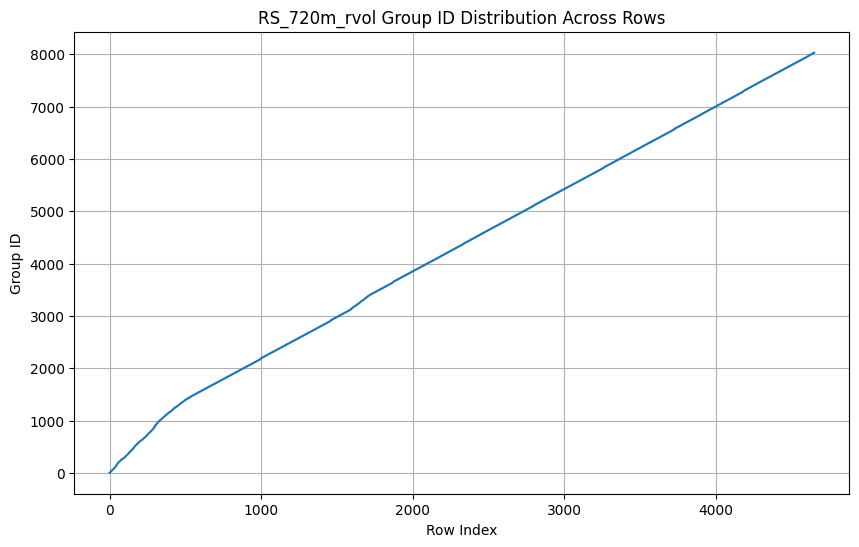

In [88]:
plt.figure(figsize=(10, 6))
plt.plot( RS_720m_rvol.index, RS_720m_rvol['group_id'])
plt.xlabel('Row Index')
plt.ylabel('Group ID')
plt.title('RS_720m_rvol Group ID Distribution Across Rows')
plt.grid(True)
plt.show()

In [89]:
RS_720m_rvol['group_id'].describe()

count    4648.000000
mean     4301.540017
std      2200.725397
min         2.000000
25%      2442.750000
50%      4358.500000
75%      6193.250000
max      8031.000000
Name: group_id, dtype: float64

In [90]:
average_dist_pred_rvol(RS_720m_rvol)

np.float64(1.7277813643210673)

In [91]:
rvol_2880m_rs

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_2880min_Rogers-Satchell
0,13.0,2010-01-27,2010-01-28 23:59:00,1.40750,1.40870,1.39120,1.39300,0.0,273.0,2606.0,0.001782
1,19.0,2010-02-08,2010-02-09 23:59:00,1.36450,1.38390,1.36220,1.37540,0.0,236.0,2643.0,0.001819
2,62.0,2010-05-05,2010-05-06 23:59:00,1.29580,1.29950,1.25180,1.27050,0.0,147.0,2732.0,0.003103
3,65.0,2010-05-11,2010-05-12 23:59:00,1.27450,1.27580,1.26040,1.26470,0.0,197.0,2682.0,0.002330
4,68.0,2010-05-17,2010-05-18 23:59:00,1.22650,1.24430,1.21430,1.21910,0.0,134.0,2745.0,0.002777
...,...,...,...,...,...,...,...,...,...,...,...
744,2000.0,2020-12-14,2020-12-15 23:59:00,1.21331,1.21767,1.21210,1.21647,0.0,76.0,2803.0,0.000922
745,2001.0,2020-12-16,2020-12-17 23:59:00,1.21647,1.22726,1.21250,1.22405,0.0,28.0,2851.0,0.001118
746,2004.0,2020-12-22,2020-12-23 23:59:00,1.22230,1.22570,1.21520,1.22043,0.0,59.0,2820.0,0.001063
747,2007.0,2020-12-28,2020-12-29 23:59:00,1.22102,1.22948,1.21913,1.22848,0.0,59.0,2820.0,0.000934


In [92]:
rvol_2880m_rs['n_minus_1_mean']+rvol_2880m_rs['indicator_sum']

0      2879.0
1      2879.0
2      2879.0
3      2879.0
4      2879.0
        ...  
744    2879.0
745    2879.0
746    2879.0
747    2879.0
748    2458.0
Length: 749, dtype: float64

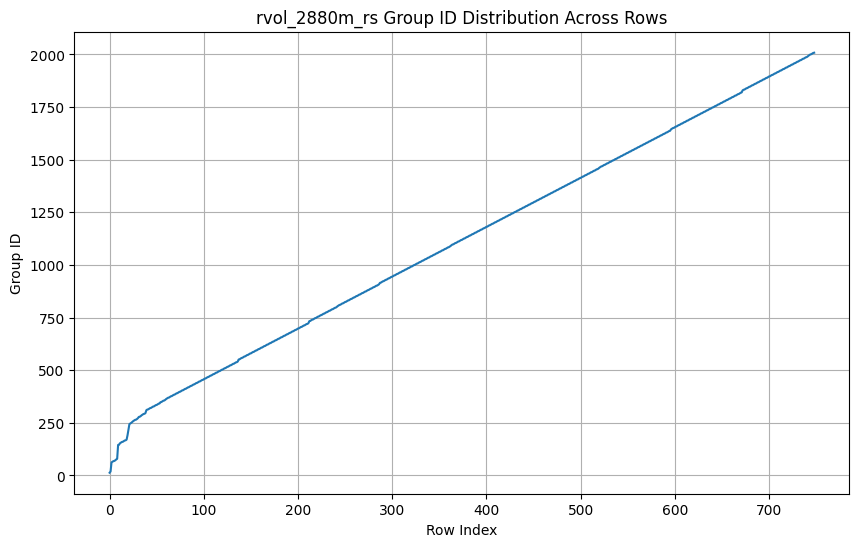

In [93]:
plt.figure(figsize=(10, 6))
plt.plot( rvol_2880m_rs.index, rvol_2880m_rs['group_id'])
plt.xlabel('Row Index')
plt.ylabel('Group ID')
plt.title('rvol_2880m_rs Group ID Distribution Across Rows')
plt.grid(True)
plt.show()

In [94]:
average_dist_pred_rvol(rvol_2880m_rs)

np.float64(2.6671122994652405)